# Notebook Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif as MI
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.metrics import f1_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tqdm import tqdm

In [ ]:
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import math
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import time
from scipy.sparse import coo_matrix, hstack
from sklearn.ensemble import StackingClassifier

In [ ]:
random_state=42

In [ ]:
def evaluate_model(clf, X_train, y_train, X_test, y_test):
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    print("\tTrain Confusion Matrix:")
    cm = confusion_matrix(y_train, clf.predict(X_train))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
    disp.plot()
    plt.show()
    print("-"*50)
    print("\tclassification_report:\n", classification_report(y_test, clf.predict(X_test)))
    print("-"*50)
    print("Validation Accuracy :", accuracy_score(y_test, clf.predict(X_test)))
    print("\t\t validation Confusion Matrix:")
    cm = confusion_matrix(y_test, clf.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
    disp.plot()

    plt.show()

In [550]:
def evaluate_model_nn(clf, X_train, y_train, X_test, y_test):
    print("Train Accuracy :", accuracy_score(y_train, np.argmax(clf.predict(X_train), axis=1)))
    print("\tTrain Confusion Matrix:")

    cm = confusion_matrix(y_train, np.argmax(clf.predict(X_train), axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['O0', 'O2'])
    disp.plot()
    plt.show()
    print("-"*50)
    print("\tclassification_report:\n", classification_report(y_test, np.argmax(clf.predict(X_test), axis=1)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, np.argmax(clf.predict(X_test), axis=1)))
    print("\t\t test Confusion Matrix:")
    cm = confusion_matrix(y_test,np.argmax(clf.predict(X_test), axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['O0', 'O2'])
    disp.plot()

    plt.show()

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
strings_CSV= '/content/drive/MyDrive/Compiler-Provenance-Project/strings.csv'
diassembled_CSV= '/content/drive/MyDrive/Compiler-Provenance-Project/diassembled.csv'

In [ ]:
import pandas as pd
diassem_data = pd.read_csv(diassembled_CSV) # Takes 5 secs
string_data = pd.read_csv(strings_CSV) # Takes 5 secs

In [ ]:
data= pd.concat([diassem_data,string_data['string']], axis=1)
# Cleaning the data and extracting a minor dataset(open_source)
unknown=data.loc[(data['opt_level'] == 'UNKNOWN')]
opensource=data.loc[(data['dataset'] == 'Open Source Projects')]

data.drop(unknown.index, inplace = True)
data.drop(opensource.index, inplace = True)


print('Data Coulmns:',data.columns.values.tolist())
print('Number of samples:', data.shape[0])

Data Coulmns: ['id', 'dataset', 'compiler', 'opt_level', 'dissambled', 'string']
Number of samples: 957


In [ ]:
data.head()

,id,dataset,compiler,opt_level,dissambled,string
12,21-x,Google Code Jam,XCODE,O0,00000000 CF iret\n00000001 FA...,__PAGEZERO\n__TEXT\n__text\n__TEXT\n__stubs\n_...
13,2-x,Google Code Jam,XCODE,O0,00000000 CF iret\n00000001 FA...,__PAGEZERO\n__TEXT\n__text\n__TEXT\n__stubs\n_...
14,23-x,Google Code Jam,XCODE,O0,00000000 CF iret\n00000001 FA...,__PAGEZERO\n__TEXT\n__text\n__TEXT\n__stubs\n_...
15,4-x,Google Code Jam,XCODE,O0,00000000 CF iret\n00000001 FA...,__PAGEZERO\n__TEXT\n__text\n__TEXT\n__stubs\n_...
16,27-x,Google Code Jam,XCODE,O0,00000000 CF iret\n00000001 FA...,__PAGEZERO\n__TEXT\n__text\n__TEXT\n__stubs\n_...


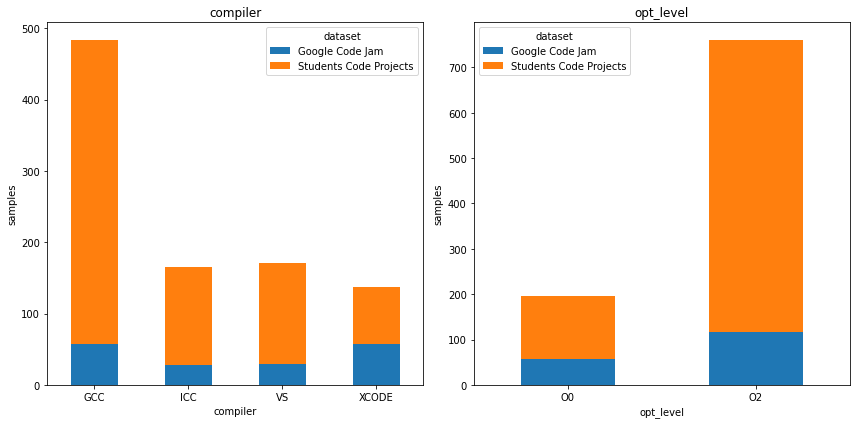

In [ ]:
fig = plt.figure(figsize=(12,6))

for i, col in enumerate(['compiler','opt_level']):
    fig.add_subplot(1, 2, i + 1)
    df_plot = data.groupby([col, 'dataset']).size().reset_index().pivot(columns='dataset', index=col, values=0)
    df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title=col, rot=0)
    plt.ylabel('samples')

fig.tight_layout()

# Random Data Split

In [ ]:
data= pd.concat([diassem_data,string_data['string']], axis=1)
# Cleaning the data and extracting a minor dataset(open_source)
unknown=data.loc[(data['opt_level'] == 'UNKNOWN')]
opensource=data.loc[(data['dataset'] == 'Open Source Projects')]
data.drop(unknown.index, inplace = True)
data.drop(opensource.index, inplace = True)

In [ ]:
X= pd.concat([data['dissambled'],data['string']], keys=['disassem', 'strings'], axis=1)
Y= pd.concat([data['dataset'],data['compiler'], data['opt_level']], keys=['dataset','compiler', 'opt_level'], axis=1)

print("x shape:{}\t y shape:{}".format(X.shape,Y.shape))

x shape:(957, 2)	 y shape:(957, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state= random_state)

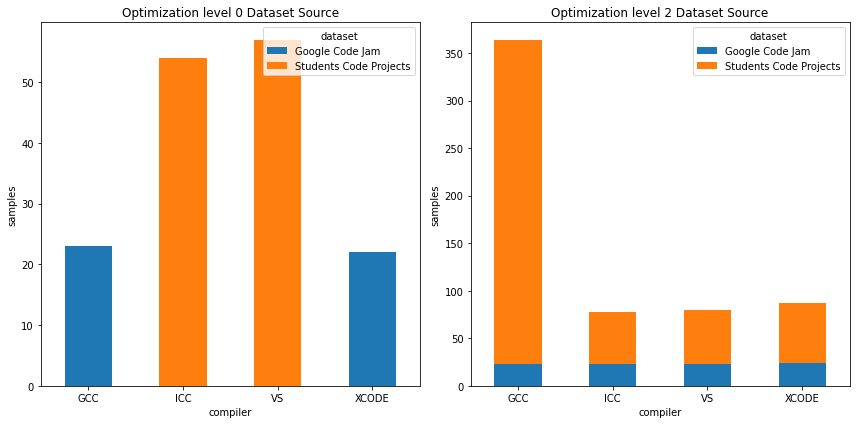

In [ ]:
fig = plt.figure(figsize=(12,6))

fig.add_subplot(1, 2, 1)
df_plot = y_train.loc[(data['opt_level'] == 'O0')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 0 Dataset Source', rot=0)
plt.ylabel('samples')

fig.add_subplot(1, 2, 2)
df_plot = y_train.loc[(data['opt_level'] == 'O2')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 2 Dataset Source', rot=0)
plt.ylabel('samples')

fig.tight_layout()

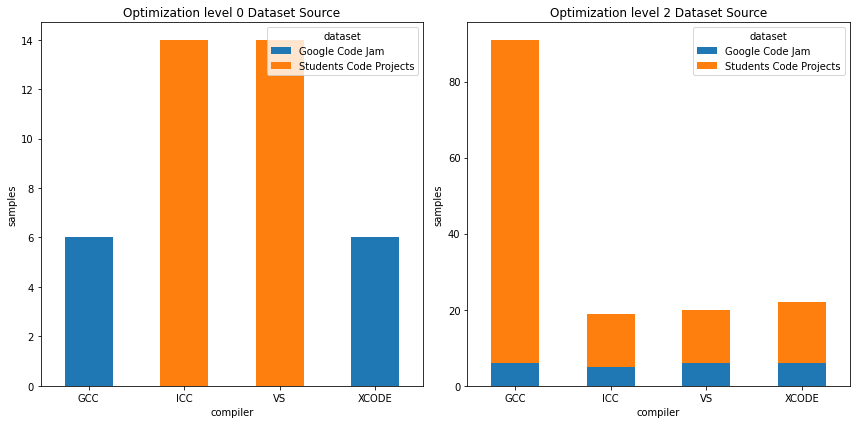

In [ ]:
fig = plt.figure(figsize=(12,6))

fig.add_subplot(1, 2, 1)
df_plot = y_test.loc[(data['opt_level'] == 'O0')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 0 Dataset Source', rot=0)
plt.ylabel('samples')

fig.add_subplot(1, 2, 2)
df_plot = y_test.loc[(data['opt_level'] == 'O2')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 2 Dataset Source', rot=0)
plt.ylabel('samples')

fig.tight_layout()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train['compiler'])
x_comp = le.transform(y_train['compiler'])
x_comp_test = le.transform(y_test['compiler'])
list(le.classes_)

['GCC', 'ICC', 'VS', 'XCODE']

In [ ]:
x_comp = pd.DataFrame(x_comp, columns = ['compiler'])
x_comp_test = pd.DataFrame(x_comp_test, columns = ['compiler'])
x_comp_test.head()

,compiler
0,1
1,0
2,0
3,0
4,1


# Hyperparameter Tuning

### Text Vectorizers

In [ ]:
def build_vectorizers(max_features,x_to_vect, vector_type= 'count' ):
  # vector_type='tfid' or 'count'
  # max_features takes int of number of features to be returned, or takes None for max features
  
  ####### How to Use #######
  # vectorizer = build_vectorizers(200, x_to_vect)
  ##########################
  
  if vector_type== 'count':
    vectorizer = CountVectorizer(max_features=max_features).fit(x_to_vect)
  elif  vector_type== 'tfid':
    vectorizer = TfidfVectorizer(max_features=max_features).fit(x_to_vect)

  # Printing the unique words and their indices
  features=vectorizer.vocabulary_.keys()

  # print("Vocabulary: ", features)

  return vectorizer

In [ ]:
def transform_vectors(vectorizer, x_train_trans, x_test_trans= None):

  ####### How to Use #######
  # X_train, X_test = transform_vectors(string_vectorizer, x_train_trans, x_test_trans)
  ##########################

  vector_train = vectorizer.transform(x_train_trans).toarray() 
  features=vectorizer.vocabulary_.keys()
  X_train_vector=pd.DataFrame(vector_train,columns=features)

  try:
    if not x_test_trans.empty:
      vector_test = vectorizer.transform(x_test_trans).toarray() 
      X_test_vector=pd.DataFrame(vector_test,columns=features)
      return X_train_vector, X_test_vector
  except:
    return X_train_vector

### Feature Filtering

In [ ]:
def k_features_filter(k,x_train,y_train,features,selector=None):
  # Takes k, X_train, and Y_train
  # Returns the best k features names for Chi2, and Anova

  ## Chi2
  new_features_chi2=SelectKBest(chi2, k=k).fit(x_train,y_train).get_feature_names_out(features)
  
  ## Anova
  new_features_anova=SelectKBest(f_classif, k=k).fit(x_train,y_train).get_feature_names_out(features)
  
  if selector=='chi2':
    return new_features_chi2
  elif selector=='anova':
    return new_features_anova
  
  return new_features_chi2, new_features_anova 

In [ ]:
def best_features_extraction(X_train_init, y_train_init, k_int=4, vector_type= 'count'):
  
  kfold = KFold(n_splits=5)
  k_score_best = []
  selectors_best = []
  max_features_list=[]
  k_list=[]
  anova_scores=[]
  chi2_scores=[]

  for max_features in [50, 500, 2000, 20000]:
    print(f'Fitting at Num. of max_features = {max_features}' )
    vectorizer = build_vectorizers(max_features,X_train_init,vector_type= vector_type )
    X_train_vector= transform_vectors(vectorizer, X_train_init)
    features_names= X_train_vector.columns.values.tolist()
    X_train_vector.index=y_train_init.index
    
    # Loop on k features range
    for k in range(k_int,15,2):

      chi2_fold_accuracies=[]
      anova_fold_accuracies=[]

      # Tuning the best features number applying cross validation 
      for train_indicies, val_indicies in kfold.split(X_train_vector):
        # Splitting the train data to folds of train and validation
        train_indicies	= X_train_vector.index.values[train_indicies]
        val_indicies		= X_train_vector.index.values[val_indicies]

        X_train_fold, X_val_fold = X_train_vector.loc[train_indicies,:], X_train_vector.loc[val_indicies,:]
        Y_train_fold, Y_val_fold = y_train_init.loc[train_indicies], y_train_init.loc[val_indicies]

        # Getting the best k features for this fold
        new_features_chi2, new_features_anova= k_features_filter(k,X_train_fold, Y_train_fold, features_names)
        # Appling the train fold to train the model
        clf_chi2  =   DecisionTreeClassifier(random_state=random_state).fit(X_train_fold[new_features_chi2],Y_train_fold)
        clf_anova  =   DecisionTreeClassifier(random_state=random_state).fit(X_train_fold[new_features_anova],Y_train_fold)

        # Calculating the accuracy_score for this fold
        y_chi2    =   clf_chi2.predict(X_val_fold[new_features_chi2])
        y_anova    =   clf_anova.predict(X_val_fold[new_features_anova])
        score_chi2=   accuracy_score(Y_val_fold,y_chi2)
        score_anova=   accuracy_score(Y_val_fold,y_anova)

        chi2_fold_accuracies.append(score_chi2)
        anova_fold_accuracies.append(score_anova)
      # Getting the mean accuracy for the 5 folds at each k 
      score_chi2 =  mean(chi2_fold_accuracies)
      score_anova = mean(anova_fold_accuracies)
      anova_scores.append(score_anova)
      chi2_scores.append(score_chi2)
    
      scores=np.array([score_anova,score_chi2])
      selectors=['anova','chi2']

      k_list.append(k)
      max_features_list.append(max_features)

      # print(f'At Num. of max_features = {max_features}, k = {k}, best feature selector is {selectors[np.argmax(scores)]}, accuracy_score = {scores[np.argmax(scores)]*100}%' )
    
  feature_selection_evaluation= pd.DataFrame({'max_features':max_features_list, 'k': k_list, 'Anova': anova_scores,'Chi2': chi2_scores})
  return feature_selection_evaluation

In [ ]:
def best_features_params(df):
  highest_anova=df.iloc[df['Anova'].argmax(axis=0)]['Anova']
  highest_chi2=df.iloc[df['Chi2'].argmax(axis=0)]['Chi2']
  best_selector= 'Anova' if (highest_anova >highest_chi2) else 'Chi2'
  highest_score= highest_anova if (highest_anova >highest_chi2) else highest_chi2
  
  k= df.iloc[df[best_selector].argmax(axis=0)]['k']
  max_features= df.iloc[df[best_selector].argmax(axis=0)]['max_features']

  return max_features,k, best_selector, highest_score

### Tune Features (TFIDF)

In [ ]:
FS_eval_strings_compiler= best_features_extraction(X_train['strings'], y_train['compiler'], vector_type='tfid')
FS_eval_strings_opt_level= best_features_extraction(X_train['strings'], y_train['opt_level'],k_int=2, vector_type='tfid')
FS_eval_disassem_compiler= best_features_extraction(X_train['disassem'], y_train['compiler'], vector_type='tfid')
FS_eval_disassem_opt_level= best_features_extraction(X_train['disassem'], y_train['opt_level'],k_int=2, vector_type='tfid')

Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000


In [ ]:
print('Best max_features, k, feature selector, and accuracy for strings-compiler:',best_features_params(FS_eval_strings_compiler))
print('Best max_features, k, feature selector, and accuracy for strings-opt level:',best_features_params(FS_eval_strings_opt_level))
print('Best max_features, k, feature selector, and accuracy for disassembled-compiler:',best_features_params(FS_eval_disassem_compiler))
print('Best max_features, k, feature selector, and accuracy for disassembled-opt level:',best_features_params(FS_eval_disassem_opt_level))

Best max_features, k, feature selector, and accuracy for strings-compiler: (50.0, 8.0, 'Chi2', 0.9986928104575163)
Best max_features, k, feature selector, and accuracy for strings-opt level: (20000.0, 2.0, 'Anova', 0.8209150326797385)
Best max_features, k, feature selector, and accuracy for disassembled-compiler: (50.0, 10.0, 'Chi2', 0.9934640522875817)
Best max_features, k, feature selector, and accuracy for disassembled-opt level: (500.0, 2.0, 'Anova', 0.803921568627451)


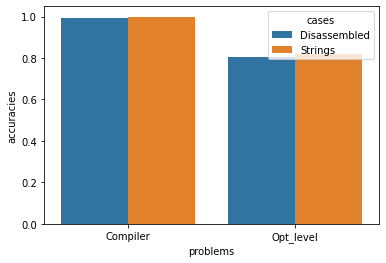

In [ ]:
cases=['Disassembled', 'Disassembled', 'Strings',  'Strings' ]
problems= ['Compiler','Opt_level','Compiler','Opt_level']
accuracies=[best_features_params(FS_eval_disassem_compiler)[3], best_features_params(FS_eval_disassem_opt_level)[3],
            best_features_params(FS_eval_strings_compiler)[3], best_features_params(FS_eval_strings_opt_level)[3] ]

plt_df= pd.DataFrame({'cases': cases, 'problems':problems,'accuracies': accuracies })
sns.barplot(data=plt_df, x='problems', y='accuracies', hue='cases')

### Tune Features (CounterVectorizer)

In [ ]:
FS_eval_strings_compiler= best_features_extraction(X_train['strings'], y_train['compiler'])
FS_eval_strings_opt_level= best_features_extraction(X_train['strings'], y_train['opt_level'])
FS_eval_disassem_compiler= best_features_extraction(X_train['disassem'], y_train['compiler'])
FS_eval_disassem_opt_level= best_features_extraction(X_train['disassem'], y_train['opt_level'])

Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000


In [ ]:
print('Best max_features, k, feature selector, and accuracy for strings-compiler:',best_features_params(FS_eval_strings_compiler))
print('Best max_features, k, feature selector, and accuracy for strings-opt level:',best_features_params(FS_eval_strings_opt_level))
print('Best max_features, k, feature selector, and accuracy for disassembled-compiler:',best_features_params(FS_eval_disassem_compiler))
print('Best max_features, k, feature selector, and accuracy for disassembled-opt level:',best_features_params(FS_eval_disassem_opt_level))

Best max_features, k, feature selector, and accuracy for strings-compiler: (500.0, 12.0, 'Chi2', 1.0)
Best max_features, k, feature selector, and accuracy for strings-opt level: (20000.0, 4.0, 'Anova', 0.8444444444444444)
Best max_features, k, feature selector, and accuracy for disassembled-compiler: (2000.0, 6.0, 'Anova', 1.0)
Best max_features, k, feature selector, and accuracy for disassembled-opt level: (2000.0, 4.0, 'Anova', 0.8522875816993464)


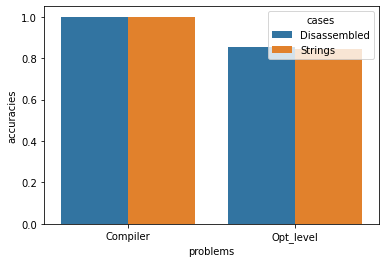

In [ ]:
cases=['Disassembled', 'Disassembled', 'Strings',  'Strings' ]
problems= ['Compiler','Opt_level','Compiler','Opt_level']
accuracies=[best_features_params(FS_eval_disassem_compiler)[3], best_features_params(FS_eval_disassem_opt_level)[3],
            best_features_params(FS_eval_strings_compiler)[3], best_features_params(FS_eval_strings_opt_level)[3] ]

plt_df= pd.DataFrame({'cases': cases, 'problems':problems,'accuracies': accuracies })
sns.barplot(data=plt_df, x='problems', y='accuracies', hue='cases')

### Plots

Strings with compiler classification problem


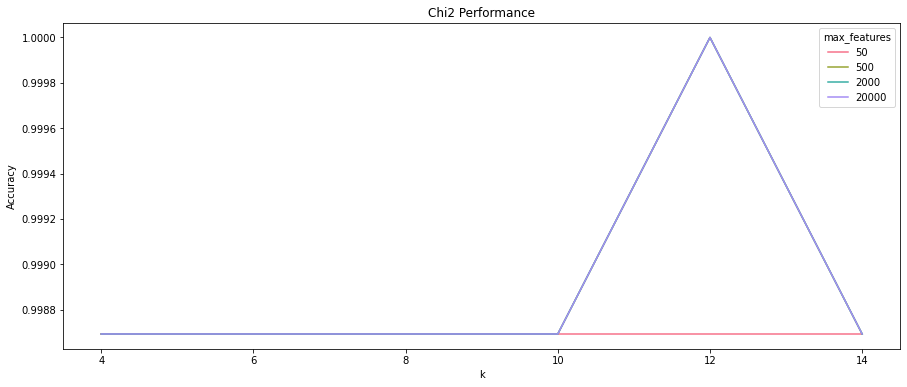

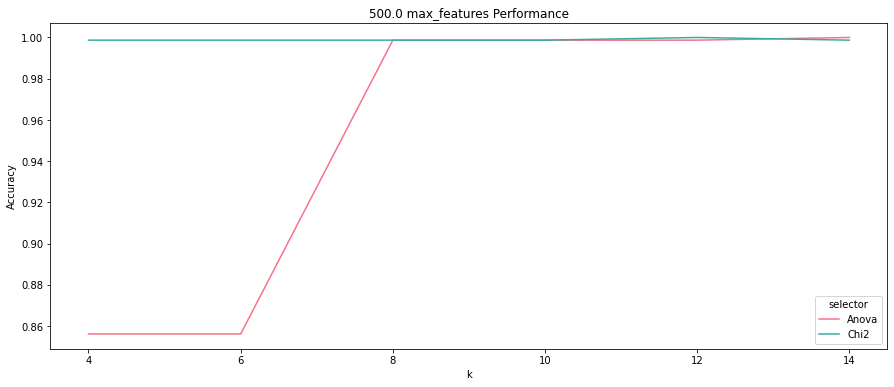

In [ ]:
print('Strings with compiler classification problem')
eval=FS_eval_strings_compiler


eval['max_features']=eval['max_features'].fillna('None')

# Plot 
best_max_features, best_k, best_selector, _= best_features_params(FS_eval_strings_compiler)
palette = sns.color_palette("husl", 4)
plt.figure(figsize=(15,6))
plt.title(f'{best_selector} Performance')
plt.ylabel('Accuracy')
plt_df= eval
sns.lineplot(data=plt_df, x='k', y= best_selector, hue='max_features', palette=palette)
plt.show()

palette = sns.color_palette("husl", 2)
plt.figure(figsize=(15,6))
plt.title(f'{best_max_features} max_features Performance')
plt.ylabel('Accuracy')
plt_df= eval.loc[(eval['max_features']== best_max_features)].melt(id_vars=['k','max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=palette)

Strings with optimization level classification problem


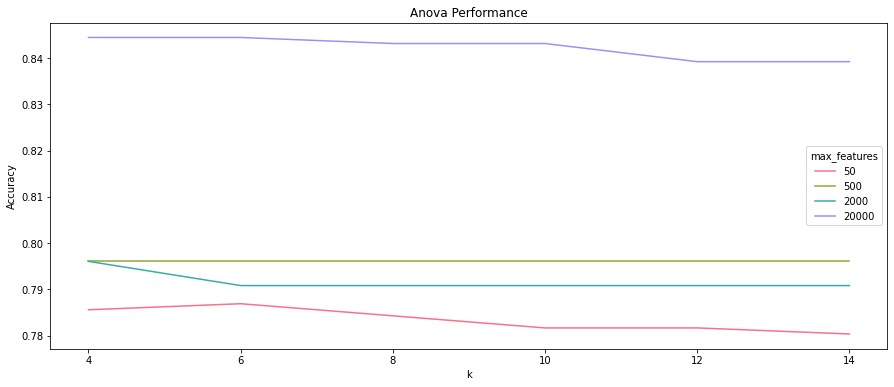

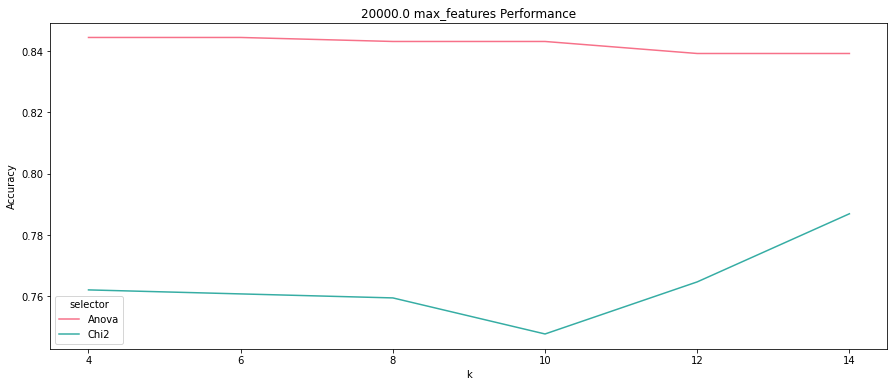

In [ ]:
print('Strings with optimization level classification problem')
eval=FS_eval_strings_opt_level


eval['max_features']=eval['max_features'].fillna('None')

# Plot 
best_max_features, best_k, best_selector, _= best_features_params(FS_eval_strings_opt_level)
palette = sns.color_palette("husl", 4)
plt.figure(figsize=(15,6))
plt.title(f'{best_selector} Performance')
plt.ylabel('Accuracy')
plt_df= eval
sns.lineplot(data=plt_df, x='k', y= best_selector, hue='max_features', palette=palette)
plt.show()

palette = sns.color_palette("husl", 2)
plt.figure(figsize=(15,6))
plt.title(f'{best_max_features} max_features Performance')
plt.ylabel('Accuracy')
plt_df= eval.loc[(eval['max_features']== best_max_features)].melt(id_vars=['k','max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=palette)

Disassemble with compiler classification problem


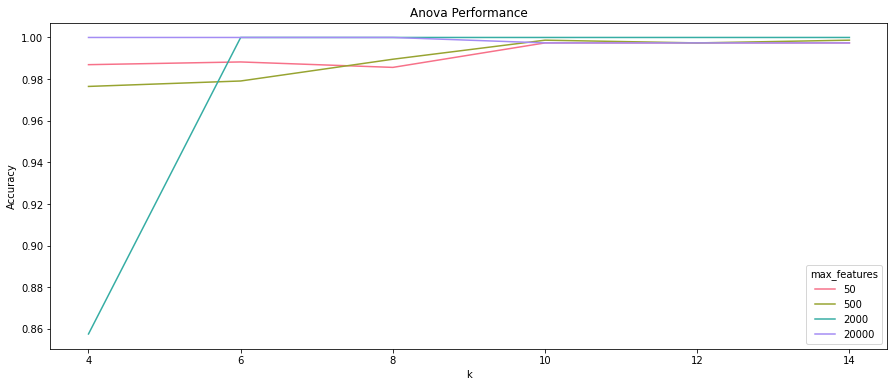

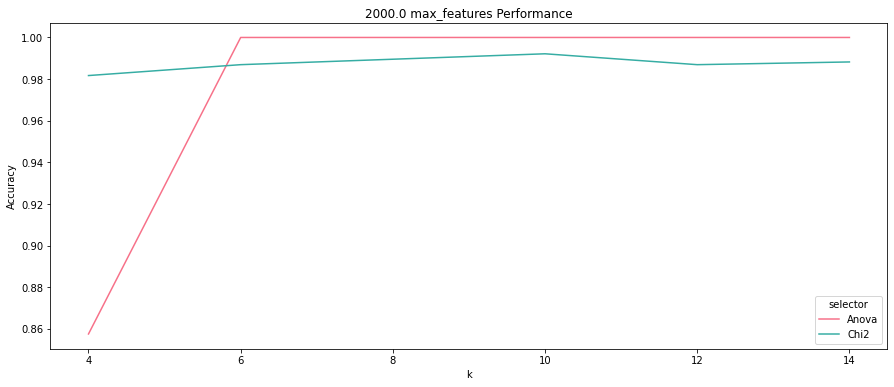

In [ ]:
print('Disassemble with compiler classification problem')
eval=FS_eval_disassem_compiler


eval['max_features']=eval['max_features'].fillna('None')

# Plot 
best_max_features, best_k, best_selector, _= best_features_params(FS_eval_disassem_compiler)
palette = sns.color_palette("husl", 4)
plt.figure(figsize=(15,6))
plt.title(f'{best_selector} Performance')
plt.ylabel('Accuracy')
plt_df= eval
sns.lineplot(data=plt_df, x='k', y= best_selector, hue='max_features', palette=palette)
plt.show()

palette = sns.color_palette("husl", 2)
plt.figure(figsize=(15,6))
plt.title(f'{best_max_features} max_features Performance')
plt.ylabel('Accuracy')
plt_df= eval.loc[(eval['max_features']== best_max_features)].melt(id_vars=['k','max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=palette)

Disassemble with optimization level classification problem


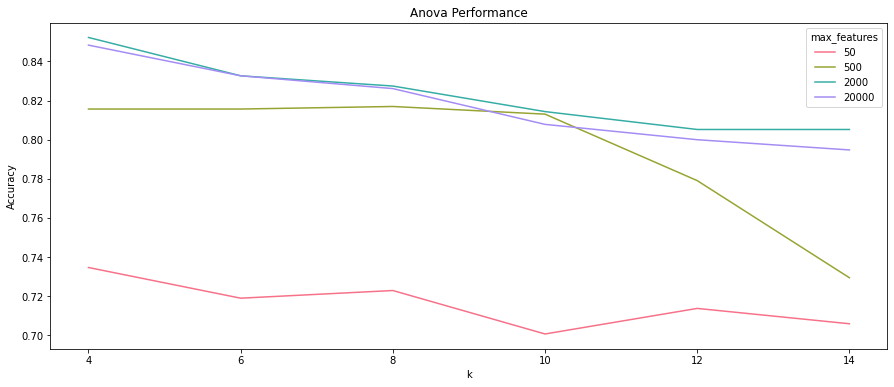

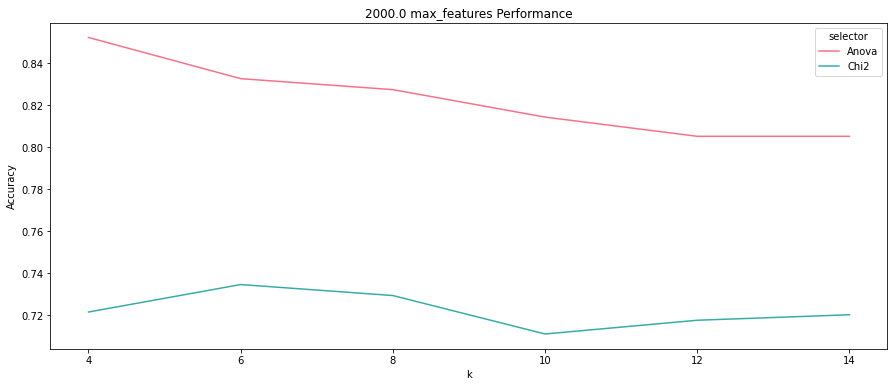

In [ ]:
print('Disassemble with optimization level classification problem')
eval=FS_eval_disassem_opt_level


eval['max_features']=eval['max_features'].fillna('None')

# Plot 
best_max_features, best_k, best_selector, _= best_features_params(FS_eval_disassem_opt_level)
palette = sns.color_palette("husl", 4)
plt.figure(figsize=(15,6))
plt.title(f'{best_selector} Performance')
plt.ylabel('Accuracy')
plt_df= eval
sns.lineplot(data=plt_df, x='k', y= best_selector, hue='max_features', palette=palette)
plt.show()

palette = sns.color_palette("husl", 2)
plt.figure(figsize=(15,6))
plt.title(f'{best_max_features} max_features Performance')
plt.ylabel('Accuracy')
plt_df= eval.loc[(eval['max_features']== best_max_features)].melt(id_vars=['k','max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=palette)

# Multi Target

### Disassembled - Compiler

In [ ]:
vectorizer = build_vectorizers(20000,X_train['disassem'])
X_train_disassem, X_test_disassem= transform_vectors(vectorizer, X_train['disassem'], x_test_trans=X_test['disassem'])
features_names= X_train_disassem.columns.values.tolist()
new_features= k_features_filter( 4, X_train_disassem,y_train['compiler'], features_names,  selector='anova')
X_train_disassem_compiler= X_train_disassem[new_features]
X_test_disassem_compiler= X_test_disassem[new_features]

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_compiler)
X_victorized_test_scaled = scaler.transform(X_test_disassem_compiler)
y_train_grid = pd.concat([y_train['compiler'], y_train['opt_level']], keys=['compiler', 'opt_level'], axis=1)
y_test_grid= pd.concat([y_test['compiler'], y_test['opt_level']], keys=['compiler', 'opt_level'], axis=1)

In [ ]:
y_test_grid

,compiler,opt_level
862,ICC,O2
637,GCC,O2
536,GCC,O2
524,GCC,O2
777,ICC,O0
...,...,...
550,GCC,O2
490,GCC,O2
893,ICC,O2
753,VS,O2


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
multi_target_LR = MultiOutputClassifier(LogisticRegression(random_state=random_state, max_iter=10000))


clf_string_compiler = multi_target_LR.fit(X_victorized_train_scaled, y_train_grid)
clf_string_compiler.score(X_victorized_test_scaled, y_test_grid)

0.7916666666666666

# OverSampling

### Strings - Compiler

In [ ]:
vectorizer = build_vectorizers(50,X_train['strings'])
X_train_strings, X_test_strings = transform_vectors(vectorizer, X_train['strings'], x_test_trans=X_test['strings'])
features_names= X_train_strings.columns.values.tolist()
new_features= k_features_filter( 12, X_train_strings,y_train['compiler'], features_names,  selector='chi2')
X_train_strings_compiler= X_train_strings[new_features]
X_test_strings_compiler= X_test_strings[new_features]

In [ ]:
xx= X_train_strings_compiler
yy=y_train['compiler']
X_train_strings_compiler,y_train_strings_compiler= SMOTE().fit_resample(xx,yy)

In [ ]:
df_plot

dataset,Google Code Jam,Students Code Projects
compiler,,
GCC,6,85
ICC,5,14
VS,6,14
XCODE,6,16


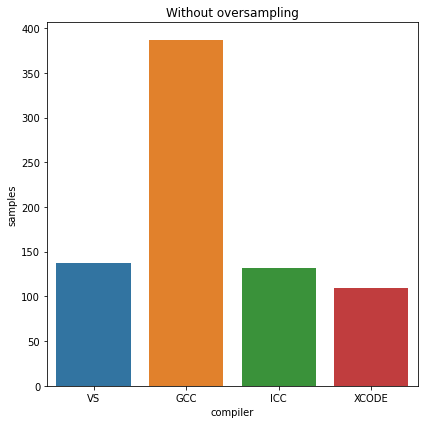

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x=y_train['compiler'])
plt.ylabel('samples')
plt.title('Without oversampling')
fig.tight_layout()

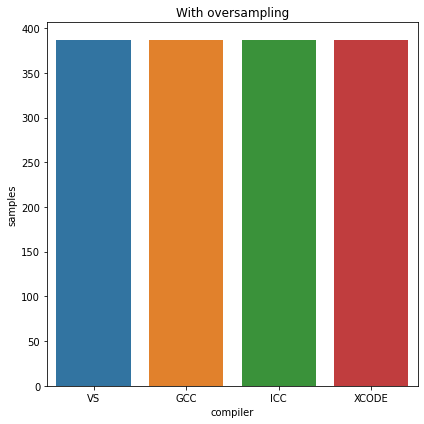

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x=y_train_strings_compiler)
plt.ylabel('samples')
plt.title('With oversampling')
fig.tight_layout()

### Disassembled - Compiler

In [ ]:
vectorizer = build_vectorizers(20000,X_train['disassem'])
X_train_disassem, X_test_disassem= transform_vectors(vectorizer, X_train['disassem'], x_test_trans=X_test['disassem'])
features_names= X_train_disassem.columns.values.tolist()
new_features= k_features_filter( 4, X_train_disassem,y_train['compiler'], features_names,  selector='anova')
X_train_disassem_compiler= X_train_disassem[new_features]
X_test_disassem_compiler= X_test_disassem[new_features]

In [ ]:
xx= X_train_disassem_compiler
yy=y_train['compiler']
X_train_disassem_compiler,y_train_disassem_compiler= SMOTE().fit_resample(xx,yy)

### Strings - Optimization Level

In [ ]:
vectorizer = build_vectorizers(20000,X_train['strings'])
X_train_strings, X_test_strings= transform_vectors(vectorizer, X_train['strings'],x_test_trans=X_test['strings'])
features_names= X_train_strings.columns.values.tolist()
new_features= k_features_filter( 6, X_train_strings,y_train['opt_level'], features_names,  selector='anova')
X_train_strings_opt= X_train_strings[new_features]
X_test_strings_opt= X_test_strings[new_features]

In [ ]:
X_test_strings_opt = pd.concat([X_test_strings_opt, x_comp_test], axis = 1)

In [ ]:
xx= pd.concat([X_train_strings_opt, x_comp], axis = 1)
yy=y_train['opt_level']
X_train_strings_opt,y_train_strings_opt= SMOTE().fit_resample(xx,yy)

In [ ]:
X_test_strings_opt

,__znst13basic_ostreamiwst11char_traitsiwee9_m_insertideers2_t_,_znst13basic_istreamiwst11char_traitsiweersery,_zn9__gnu_cxx13new_allocatori5pointed2ev,2t2x2,9x,__zl1n,compiler
0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,0
2,1,1,1,1,1,0,0
3,1,1,1,1,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
187,1,1,1,1,1,0,0
188,1,1,1,1,1,0,0
189,0,0,0,0,0,0,1
190,0,0,0,0,0,0,2


### Disassembled - Optimization Level

In [ ]:
vectorizer = build_vectorizers(2000,X_train['disassem'])
X_train_disassem, X_test_disassem= transform_vectors(vectorizer, X_train['disassem'], x_test_trans=X_test['disassem'])
features_names= X_train_disassem.columns.values.tolist()
new_features= k_features_filter( 14, X_train_disassem,y_train['opt_level'], features_names,  selector='chi2')
X_train_disassem_opt= X_train_disassem[new_features]
X_test_disassem_opt= X_test_disassem[new_features]

In [ ]:
X_test_disassem_opt = pd.concat([X_test_disassem_opt, x_comp_test], axis = 1)

In [ ]:
xx= pd.concat([X_train_disassem_opt, x_comp], axis = 1)
yy=y_train['opt_level']
X_train_disassem_opt,y_train_disassem_opt= SMOTE().fit_resample(xx,yy)

### Output Variables

In [ ]:
y_train_strings_compiler= y_train_strings_compiler.to_frame()
y_train_strings_opt=y_train_strings_opt.to_frame()
y_train_disassem_compiler=y_train_disassem_compiler.to_frame()
y_train_disassem_opt=y_train_disassem_opt.to_frame()

In [ ]:
y_train_strings_compiler.value_counts()

compiler
GCC         387
ICC         387
VS          387
XCODE       387
dtype: int64

In [ ]:
y_train_strings_opt.value_counts()

opt_level
O0           609
O2           609
dtype: int64

# Grid Search

### Strings - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_compiler)
X_victorized_test_scaled = scaler.transform(X_test_strings_compiler)
y_train_grid = y_train_strings_compiler

In [ ]:
pipe_lr = Pipeline([
                    ('LR', LogisticRegression(random_state=42))])
pipe_lr.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_lr.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_svm = Pipeline([
                     ('SVM', SVC(random_state=42))])
pipe_svm.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_svm.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_mlp = Pipeline([
                     ('MLP', MLPClassifier(random_state=42))])
pipe_mlp.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_mlp.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_dt = Pipeline([
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_dt.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_dt.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_ab = Pipeline([
                    ('AB',AdaBoostClassifier(random_state=42))])
pipe_ab.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_ab.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_rf = Pipeline([
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_rf.score(X_victorized_test_scaled, y_test['compiler'].tolist()))


0.921875
0.9114583333333334
0.9427083333333334
1.0
0.8229166666666666
1.0


In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': [0.001, 0.1]}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [5,10],
                   'DT__max_depth': [5,10],
                   'DT__min_samples_split': [2,5]}]

ab_param_grid = [
    {
        'AB__n_estimators': [10, 50],
        'AB__learning_rate': [0.0001, 0.001]
    }
]

rf_param_grid = [{'RF__min_samples_leaf': [5, 10],
                  'RF__max_depth': [5, 10],
                  'RF__n_estimators': [10, 50],
                  'RF__min_samples_split': [2,5]}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

ab_grid_search = GridSearchCV(estimator=pipe_ab,
        param_grid=ab_param_grid,
        scoring='accuracy',
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=5)

In [ ]:
START = time.time()

grids = [lr_grid_search,
         dt_grid_search,
         ab_grid_search,
         rf_grid_search]
for pipe in grids:
    pipe.fit(X_victorized_train_scaled,y_train_grid['compiler'])

End = time.time()

In [ ]:
print(End-START)

7.216093063354492


In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

Logistic Regression Test Accuracy: 0.921875
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l2'}


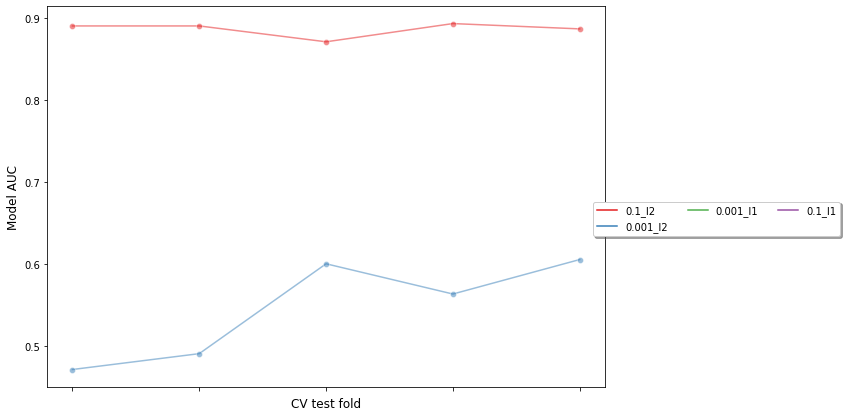

Decision Trees Test Accuracy: 1.0
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 5, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}


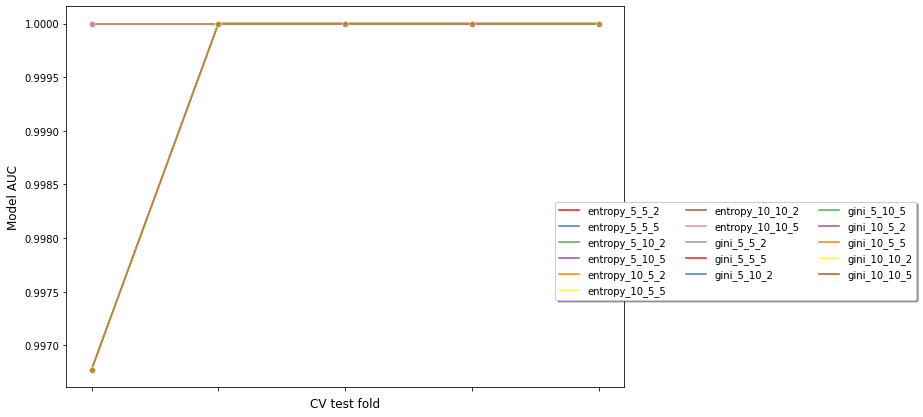

AdaBoost Test Accuracy: 1.0
AdaBoost Best Params: {'AB__learning_rate': 0.001, 'AB__n_estimators': 10}


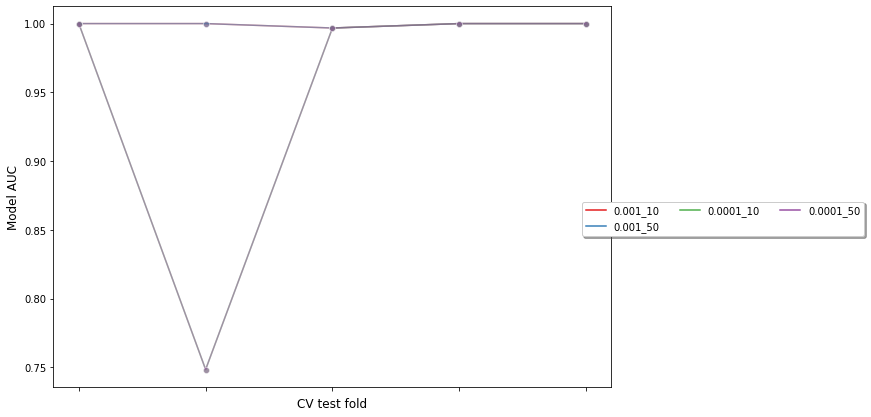

Random Forest Test Accuracy: 1.0
Random Forest Best Params: {'RF__max_depth': 5, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}


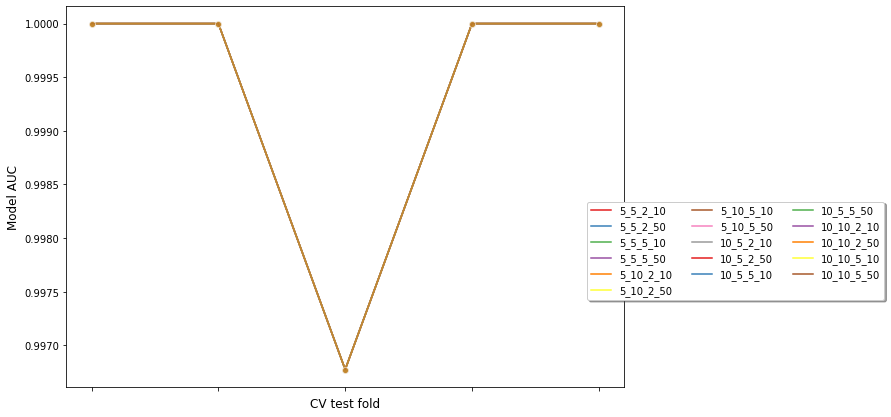

In [ ]:
grid_dict = {0: 'Logistic Regression',
             1: 'Decision Trees',
             2: 'AdaBoost',
             3: 'Random Forest'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_victorized_test_scaled,y_test['compiler'])))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

    results_df = pd.DataFrame(model.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index( results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values())) ).rename_axis("kernel")
    results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

    # create df of model scores ordered by performance
    model_scores = results_df.filter(regex=r"split\d*_test_score")

    # plot 30 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:30],
        dashes=False,
        palette="Set1",
        marker="o",
        alpha=0.5,
        ax=ax,
    )
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model AUC", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.5),
          ncol=3, fancybox=True, shadow=True)
    plt.show()

In [ ]:
clf1_LR_SC = grids[0]
clf2_DT_SC = grids[1]
clf3_AB_SC = grids[2]
clf4_RF_SC = grids[3]

### Strings - Optimization Level

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_opt)
X_victorized_test_scaled = scaler.transform(X_test_strings_opt)
y_train_grid = y_train_strings_opt

In [ ]:
pipe_lr = Pipeline([
                    ('LR', LogisticRegression(random_state=42))])
pipe_lr.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_lr.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_svm = Pipeline([
                     ('SVM', SVC(random_state=42))])
pipe_svm.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_svm.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_mlp = Pipeline([
                     ('MLP', MLPClassifier(random_state=42))])
pipe_mlp.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_mlp.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_dt = Pipeline([
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_dt.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_dt.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_ab = Pipeline([
                    ('AB',AdaBoostClassifier(random_state=42))])
pipe_ab.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_ab.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_rf = Pipeline([
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_rf.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))


0.6822916666666666
0.6822916666666666
0.6822916666666666
0.6822916666666666
0.6822916666666666
0.6822916666666666


In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': [0.001, 0.1]}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [5,10],
                   'DT__max_depth': [5,10],
                   'DT__min_samples_split': [2,5]}]

ab_param_grid = [
    {
        'AB__n_estimators': [10, 50],
        'AB__learning_rate': [0.0001, 0.001]
    }
]

rf_param_grid = [{'RF__min_samples_leaf': [5, 10],
                  'RF__max_depth': [5, 10],
                  'RF__n_estimators': [10, 50],
                  'RF__min_samples_split': [2,5]}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

ab_grid_search = GridSearchCV(estimator=pipe_ab,
        param_grid=ab_param_grid,
        scoring='accuracy',
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=5)

In [ ]:
START = time.time()

grids = [lr_grid_search,
         dt_grid_search,
         ab_grid_search,
         rf_grid_search]
for pipe in grids:
    pipe.fit(X_victorized_train_scaled,y_train_grid['opt_level'])

End = time.time()

In [ ]:
print(End-START)

6.451638221740723


In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

Logistic Regression Test Accuracy: 0.6822916666666666
Logistic Regression Best Params: {'LR__C': 0.001, 'LR__penalty': 'l2'}


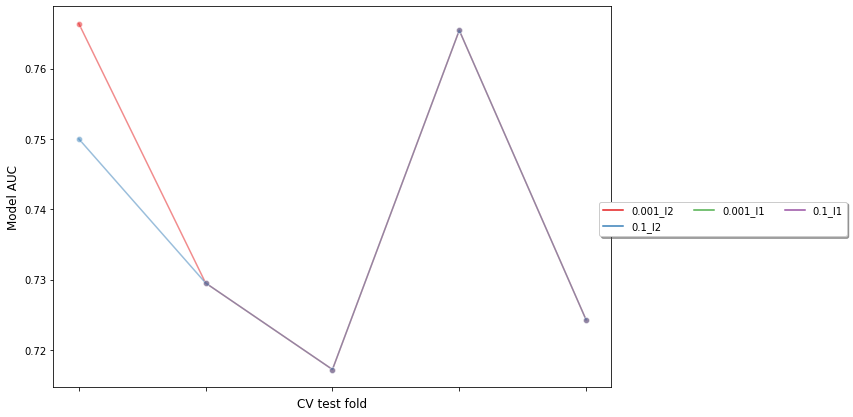

Decision Trees Test Accuracy: 0.6822916666666666
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 5, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}


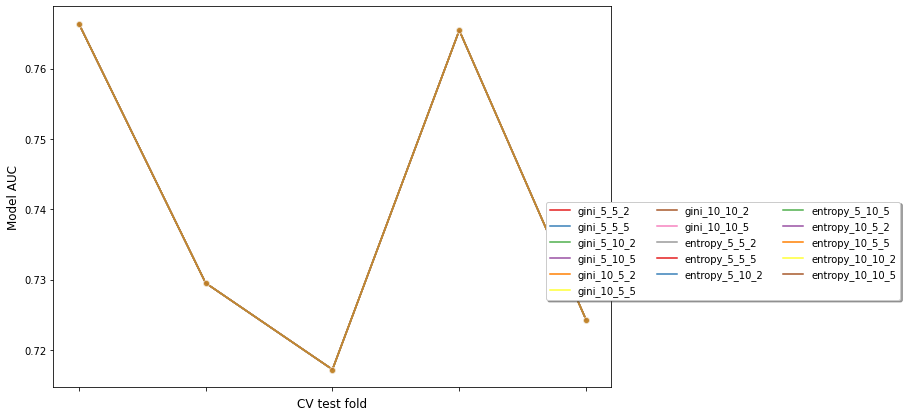

AdaBoost Test Accuracy: 0.6822916666666666
AdaBoost Best Params: {'AB__learning_rate': 0.0001, 'AB__n_estimators': 10}


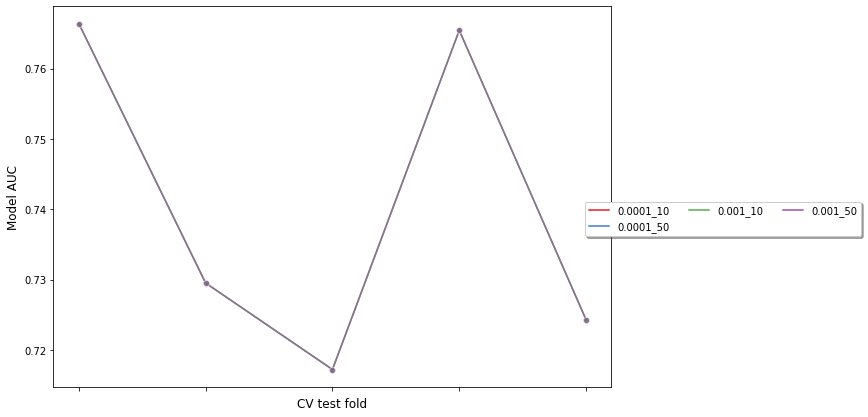

Random Forest Test Accuracy: 0.765625
Random Forest Best Params: {'RF__max_depth': 5, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}


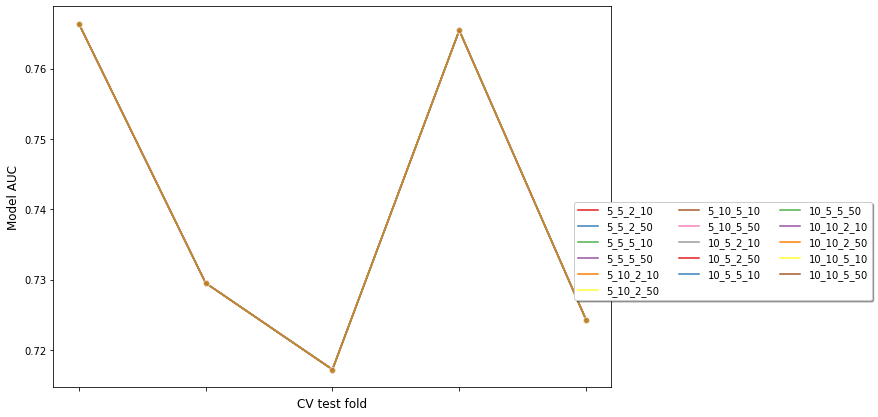

In [ ]:
grid_dict = {0: 'Logistic Regression',
             1: 'Decision Trees',
             2: 'AdaBoost',
             3: 'Random Forest'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_victorized_test_scaled,y_test['opt_level'])))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

    results_df = pd.DataFrame(model.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index( results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values())) ).rename_axis("kernel")
    results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

    # create df of model scores ordered by performance
    model_scores = results_df.filter(regex=r"split\d*_test_score")

    # plot 30 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:30],
        dashes=False,
        palette="Set1",
        marker="o",
        alpha=0.5,
        ax=ax,
    )
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model AUC", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.5),
          ncol=3, fancybox=True, shadow=True)
    plt.show()

In [ ]:
clf1_LR_SO = grids[0]
clf2_DT_SO = grids[1]
clf3_AB_SO = grids[2]
clf4_RF_SO = grids[3]

### Disassembled - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_compiler)
X_victorized_test_scaled = scaler.transform(X_test_disassem_compiler)
y_train_grid = y_train_disassem_compiler

In [ ]:
pipe_lr = Pipeline([
                    ('LR', LogisticRegression(random_state=42))])
pipe_lr.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_lr.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_svm = Pipeline([
                     ('SVM', SVC(random_state=42))])
pipe_svm.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_svm.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_mlp = Pipeline([
                     ('MLP', MLPClassifier(random_state=42))])
pipe_mlp.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_mlp.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_dt = Pipeline([
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_dt.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_dt.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_ab = Pipeline([
                    ('AB',AdaBoostClassifier(random_state=42))])
pipe_ab.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_ab.score(X_victorized_test_scaled, y_test['compiler'].tolist()))

pipe_rf = Pipeline([
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_victorized_train_scaled, y_train_grid['compiler'].tolist())
print(pipe_rf.score(X_victorized_test_scaled, y_test['compiler'].tolist()))


1.0
1.0
1.0
1.0
0.8541666666666666
1.0


In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': [0.001, 0.1]}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [5,10],
                   'DT__max_depth': [5,10],
                   'DT__min_samples_split': [2,5]}]

ab_param_grid = [
    {
        'AB__n_estimators': [10, 50],
        'AB__learning_rate': [0.0001, 0.001]
    }
]

rf_param_grid = [{'RF__min_samples_leaf': [5, 10],
                  'RF__max_depth': [5, 10],
                  'RF__n_estimators': [10, 50],
                  'RF__min_samples_split': [2,5]}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

ab_grid_search = GridSearchCV(estimator=pipe_ab,
        param_grid=ab_param_grid,
        scoring='accuracy',
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=5)

In [ ]:
START = time.time()

grids = [lr_grid_search,
         dt_grid_search,
         ab_grid_search,
         rf_grid_search]
for pipe in grids:
    pipe.fit(X_victorized_train_scaled,y_train_grid['compiler'])

End = time.time()

In [ ]:
print(End-START)

8.290656566619873


In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

Logistic Regression Test Accuracy: 1.0
Logistic Regression Best Params: {'LR__C': 0.001, 'LR__penalty': 'l2'}


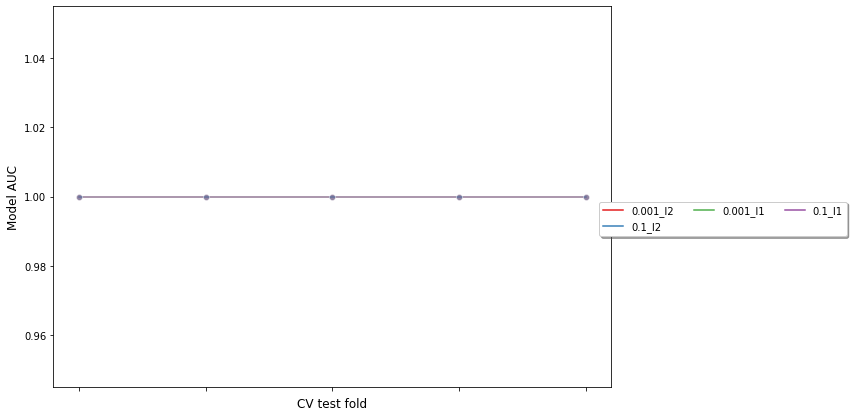

Decision Trees Test Accuracy: 1.0
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 5, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}


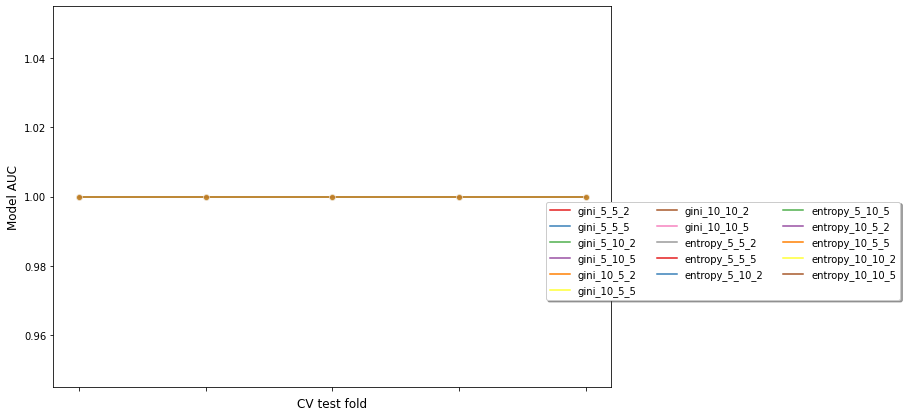

AdaBoost Test Accuracy: 1.0
AdaBoost Best Params: {'AB__learning_rate': 0.001, 'AB__n_estimators': 10}


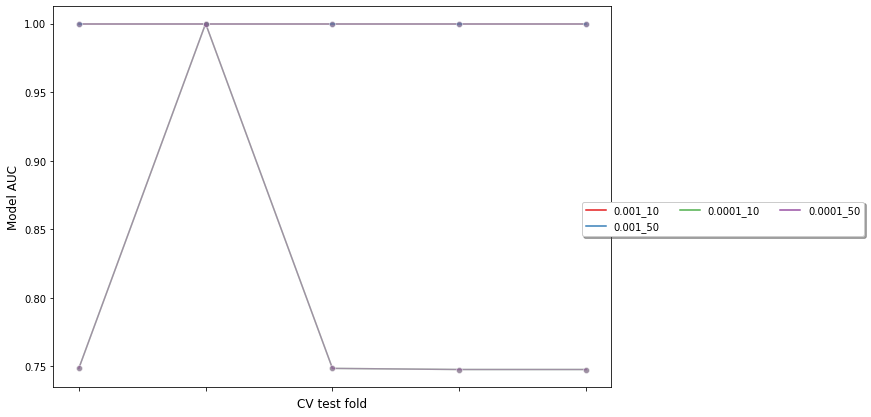

Random Forest Test Accuracy: 1.0
Random Forest Best Params: {'RF__max_depth': 5, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}


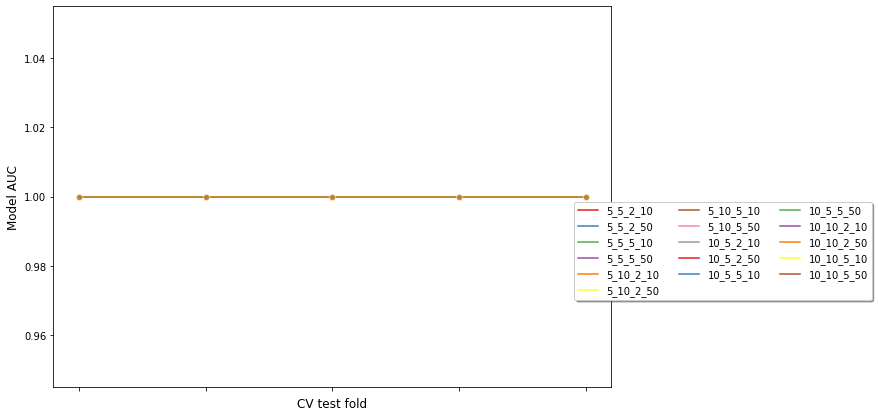

In [ ]:
grid_dict = {0: 'Logistic Regression',
             1: 'Decision Trees',
             2: 'AdaBoost',
             3: 'Random Forest'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_victorized_test_scaled,y_test['compiler'])))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

    results_df = pd.DataFrame(model.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index( results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values())) ).rename_axis("kernel")
    results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

    # create df of model scores ordered by performance
    model_scores = results_df.filter(regex=r"split\d*_test_score")

    # plot 30 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:30],
        dashes=False,
        palette="Set1",
        marker="o",
        alpha=0.5,
        ax=ax,
    )
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model AUC", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.5),
          ncol=3, fancybox=True, shadow=True)
    plt.show()

In [ ]:
clf1_LR_DC = grids[0]
clf2_DT_DC = grids[1]
clf3_AB_DC = grids[2]
clf4_RF_DC = grids[3]

### Disassembled - Optimization Level

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_opt)
X_victorized_test_scaled = scaler.transform(X_test_disassem_opt)
y_train_grid = y_train_disassem_opt

In [ ]:
pipe_lr = Pipeline([
                    ('LR', LogisticRegression(random_state=42))])
pipe_lr.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_lr.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_svm = Pipeline([
                     ('SVM', SVC(random_state=42))])
pipe_svm.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_svm.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_mlp = Pipeline([
                     ('MLP', MLPClassifier(random_state=42))])
pipe_mlp.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_mlp.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_dt = Pipeline([
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_dt.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_dt.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_ab = Pipeline([
                    ('AB',AdaBoostClassifier(random_state=42))])
pipe_ab.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_ab.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))

pipe_rf = Pipeline([
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_victorized_train_scaled, y_train_grid['opt_level'].tolist())
print(pipe_rf.score(X_victorized_test_scaled, y_test['opt_level'].tolist()))


0.7864583333333334
0.8072916666666666
0.7760416666666666
0.6822916666666666
0.7604166666666666
0.7239583333333334


In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': [0.001, 0.1]}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [5,10],
                   'DT__max_depth': [5,10],
                   'DT__min_samples_split': [2,5]}]

ab_param_grid = [
    {
        'AB__n_estimators': [10, 50],
        'AB__learning_rate': [0.0001, 0.001]
    }
]

rf_param_grid = [{'RF__min_samples_leaf': [5, 10],
                  'RF__max_depth': [5, 10],
                  'RF__n_estimators': [10, 50],
                  'RF__min_samples_split': [2,5]}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)

dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

ab_grid_search = GridSearchCV(estimator=pipe_ab,
        param_grid=ab_param_grid,
        scoring='accuracy',
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=5)

In [ ]:
START = time.time()

grids = [lr_grid_search,
         dt_grid_search,
         ab_grid_search,
         rf_grid_search]
for pipe in grids:
    pipe.fit(X_victorized_train_scaled,y_train_grid['opt_level'])

End = time.time()

In [ ]:
print(End-START)

9.368620157241821


In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

Logistic Regression Test Accuracy: 0.71875
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l2'}


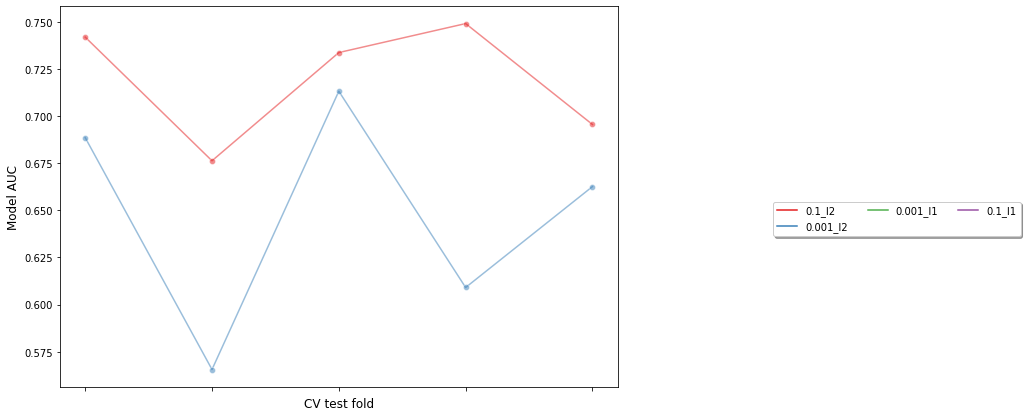

Decision Trees Test Accuracy: 0.7083333333333334
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 10, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}


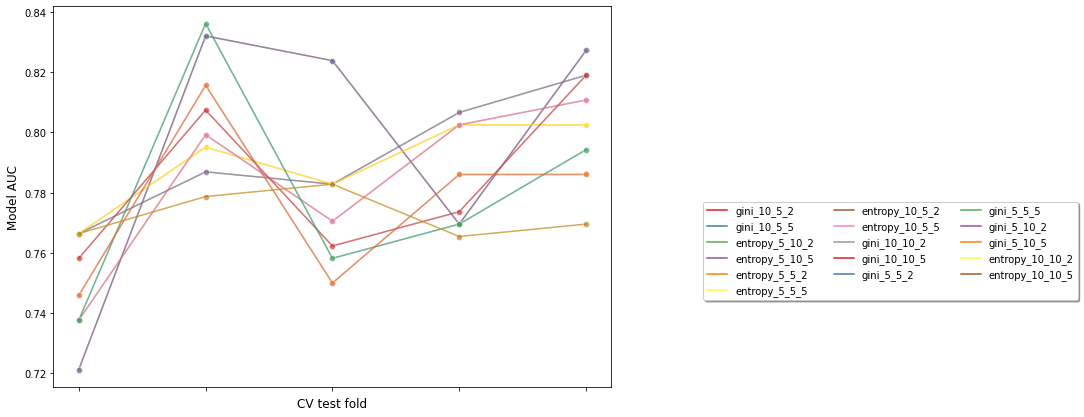

AdaBoost Test Accuracy: 0.8385416666666666
AdaBoost Best Params: {'AB__learning_rate': 0.0001, 'AB__n_estimators': 10}


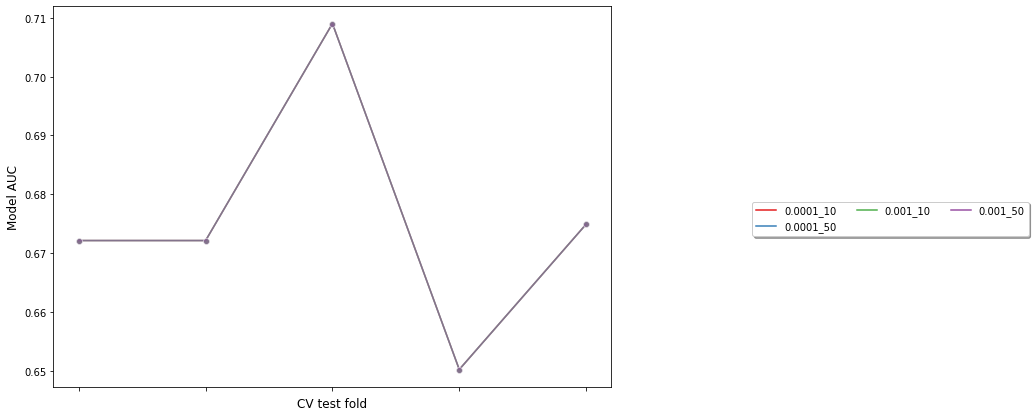

Random Forest Test Accuracy: 0.796875
Random Forest Best Params: {'RF__max_depth': 10, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}


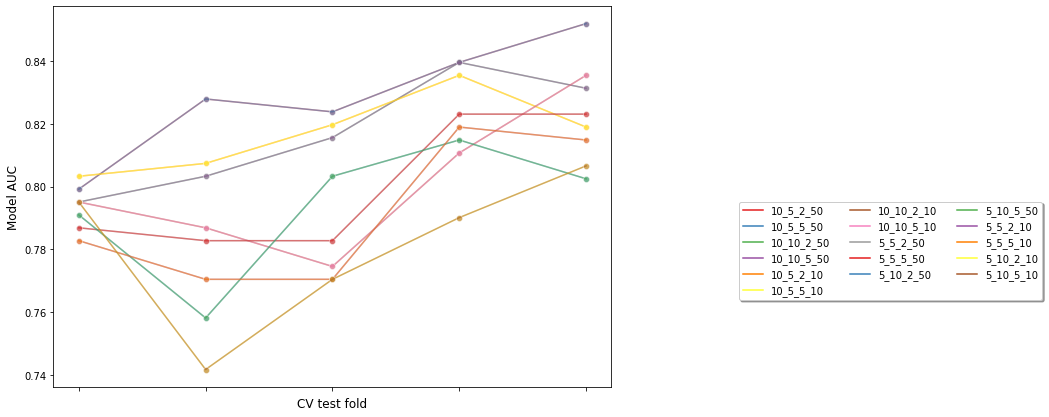

In [ ]:
grid_dict = {0: 'Logistic Regression',
             1: 'Decision Trees',
             2: 'AdaBoost',
             3: 'Random Forest'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_victorized_test_scaled,y_test['opt_level'])))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

    results_df = pd.DataFrame(model.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index( results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values())) ).rename_axis("kernel")
    results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

    # create df of model scores ordered by performance
    model_scores = results_df.filter(regex=r"split\d*_test_score")

    # plot 30 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:30],
        dashes=False,
        palette="Set1",
        marker="o",
        alpha=0.5,
        ax=ax,
    )
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model AUC", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5),
          ncol=3, fancybox=True, shadow=True)
    plt.show()

In [ ]:
clf1_LR_DO = grids[0]
clf2_DT_DO = grids[1]
clf3_AB_DO = grids[2]
clf4_RF_DO = grids[3]

# Ensemble Voting

### Strings - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_compiler)
X_victorized_test_scaled = scaler.transform(X_test_strings_compiler)
y_train_grid = y_train_strings_compiler
y_test_grid = y_test['compiler'] 

In [ ]:
clf1 = clf1_LR_SC
clf2 = clf2_DT_SC
clf3 = clf3_AB_SC
clf4= clf4_RF_SC

In [ ]:
# voting hard uses predicted class labels for majority rule voting (take the majority prediciton from models even if not the best)
estimators=[
        ('LR', clf1), ('DT', clf2), ('AB', clf3), ( 'RF', clf4) ]
        
eclf1 = VotingClassifier(estimators = estimators, voting='hard')

eclf1 = eclf1.fit(X_victorized_train_scaled, y_train_grid)
comp_ens_predict = eclf1.predict(X_victorized_test_scaled)
eclf1_score = accuracy_score(y_test_grid, comp_ens_predict)

# print(comp_ens_predict)
print('Hard voting ensemble',eclf1_score)


# # two ways to access any (one estimator for prediction) fitted sub-estimators by name.
# np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))

# voting soft predicts the class label based on the argmax of the sums of the predicted probabilities
# Predict the class with the largest summed probability from models.
eclf2 = VotingClassifier(estimators=estimators, voting='soft')

eclf2 = eclf2.fit(X_victorized_train_scaled, y_train_grid)
comp_ens2_predict = eclf2.predict(X_victorized_test_scaled)
eclf2_score = accuracy_score(y_test_grid, comp_ens2_predict)

# print(comp_ens2_predict)
print('Soft voting ensemble',eclf2_score)

Hard voting ensemble 1.0
Soft voting ensemble 1.0


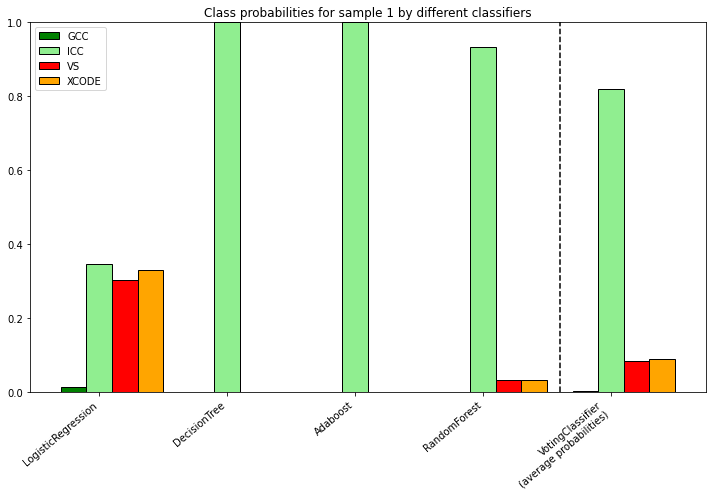

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(X_victorized_train_scaled, y_train_grid).predict_proba(X_victorized_test_scaled) for c in (clf1, clf2, clf3,clf4, eclf2)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]
class3_1 = [pr[0, 2] for pr in probas]
class4_1 = [pr[0, 3] for pr in probas]

#plotting
N = 5  # number of groups
ind = np.arange(N)  # group positions
width = 0.2  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
# 
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,color="lightgreen", edgecolor="k")
p3 = ax.bar(ind + 2*width, np.hstack(([class3_1[:-1], [0]])), width,color="red", edgecolor="k")
p4 = ax.bar(ind + 3*width, np.hstack(([class4_1[:-1], [0]])), width,color="orange", edgecolor="k")

# bars for VotingClassifier
p5 = ax.bar(ind, [0, 0, 0,0, class1_1[-1]], width, color="green", edgecolor="k")
p6 = ax.bar( ind + width, [0, 0, 0, 0, class2_1[-1]], width, color="lightgreen", edgecolor="k")
p7 = ax.bar( ind + 2*width, [0, 0, 0, 0, class3_1[-1]], width, color="red", edgecolor="k")
p8 = ax.bar( ind + 3*width, [0, 0, 0, 0, class4_1[-1]], width, color="orange", edgecolor="k")


# plot annotations
plt.axvline(3.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression",
        "DecisionTree",
        "Adaboost",
        "RandomForest",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0],p3[0], p4[0]], ["GCC", "ICC", "VS", "XCODE"], loc="upper left")
plt.tight_layout()
plt.show()

Train Accuracy : 1.0
	Train Confusion Matrix:


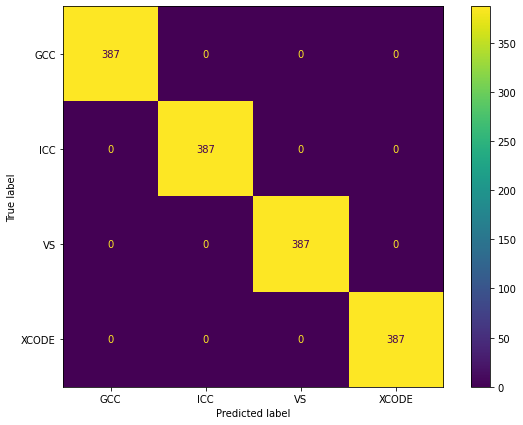

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

         GCC       1.00      1.00      1.00        97
         ICC       1.00      1.00      1.00        33
          VS       1.00      1.00      1.00        34
       XCODE       1.00      1.00      1.00        28

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

--------------------------------------------------
Validation Accuracy : 1.0
		 validation Confusion Matrix:


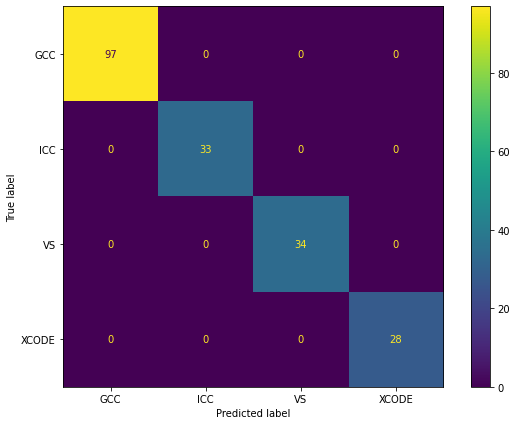

In [ ]:
evaluate_model(eclf2, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

### Strings - Optimization Level

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_opt)
X_victorized_test_scaled = scaler.transform(X_test_strings_opt)
y_train_grid = y_train_strings_opt
y_test_grid = y_test['opt_level'] 

In [ ]:
clf1 = clf1_LR_SO
clf2 = clf2_DT_SO
clf3 = clf3_AB_SO
clf4= clf4_RF_SO

In [ ]:
string_scores = []
models_names = ['LR', 'DT', 'AB', 'RF', 'hard_voting_ensemble', 'soft_voting_ensemble', 'stacking']

In [ ]:
LR_predict = clf1.predict(X_victorized_test_scaled)
LR_score = accuracy_score(y_test_grid, LR_predict)
string_scores.append(LR_score)
LR_score

0.6822916666666666

In [ ]:
DT_predict = clf2.predict(X_victorized_test_scaled)
DT_score = accuracy_score(y_test_grid, DT_predict)
string_scores.append(DT_score)
DT_score

0.6822916666666666

In [ ]:
AB_predict = clf3.predict(X_victorized_test_scaled)
AB_score = accuracy_score(y_test_grid, AB_predict)
string_scores.append(AB_score)
AB_score

0.6822916666666666

In [ ]:
RF_predict = clf4.predict(X_victorized_test_scaled)
RF_score = accuracy_score(y_test_grid, RF_predict)
string_scores.append(RF_score)
RF_score

0.765625

In [ ]:
string_scores

[0.6822916666666666, 0.6822916666666666, 0.6822916666666666, 0.765625]

In [ ]:
# voting hard uses predicted class labels for majority rule voting (take the majority prediciton from models even if not the best)
estimators=[
        ('LR', clf1), ('DT', clf2), ('AB', clf3), ( 'RF', clf4) ]
        
eclf1 = VotingClassifier(estimators = estimators, voting='hard')

eclf1 = eclf1.fit(X_victorized_train_scaled, y_train_grid)
comp_ens_predict = eclf1.predict(X_victorized_test_scaled)
eclf1_score = accuracy_score(y_test_grid, comp_ens_predict)

# print(comp_ens_predict)
print('Hard voting ensemble',eclf1_score)


# # two ways to access any (one estimator for prediction) fitted sub-estimators by name.
# np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))

# voting soft predicts the class label based on the argmax of the sums of the predicted probabilities
# Predict the class with the largest summed probability from models.
eclf2 = VotingClassifier(estimators=estimators, voting='soft')

eclf2 = eclf2.fit(X_victorized_train_scaled, y_train_grid)
comp_ens2_predict = eclf2.predict(X_victorized_test_scaled)
eclf2_score = accuracy_score(y_test_grid, comp_ens2_predict)

# print(comp_ens2_predict)
print('Soft voting ensemble',eclf2_score)

Hard voting ensemble 0.6822916666666666
Soft voting ensemble 0.6822916666666666


In [ ]:
string_scores.append(eclf1_score)
string_scores.append(eclf2_score)

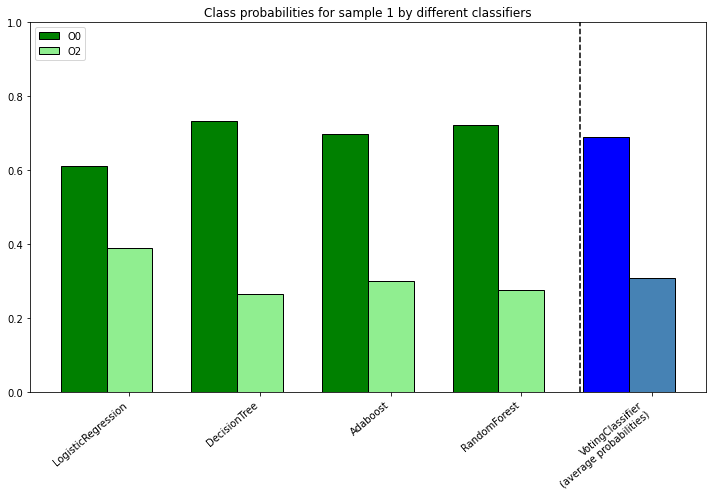

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(X_victorized_train_scaled, y_train_grid).predict_proba(X_victorized_test_scaled) for c in (clf1, clf2, clf3, clf4, eclf2)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 5  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-4
# bar probability[4 bars], one for each classifier[1-4] of the first class for the first sample
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")

# bar probability[4 bars], one for each classifier[1-4] of the second class for the first sample
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color="lightgreen", edgecolor="k")


# bars for VotingClassifier
# bar probability for the VotingClassifier of the first class for the first sample
p3 = ax.bar(ind, [0, 0, 0,0, class1_1[-1]], width, color="blue", edgecolor="k")

# bar probability for the VotingClassifier of the first class for the first sample
p4 = ax.bar(ind + width, [0, 0, 0,0, class2_1[-1]], width, color="steelblue", edgecolor="k")

# plot annotations
plt.axvline(3.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression",
        "DecisionTree",
        "Adaboost",
        "RandomForest",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["O0", "O2"], loc="upper left")
plt.tight_layout()
plt.show()

Train Accuracy : 0.7405582922824302
	Train Confusion Matrix:


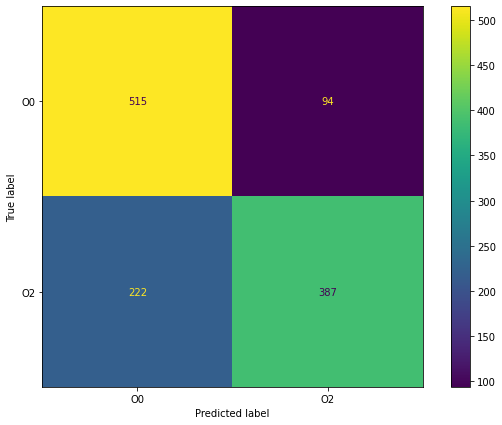

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

          O0       0.38      0.85      0.53        40
          O2       0.94      0.64      0.76       152

    accuracy                           0.68       192
   macro avg       0.66      0.74      0.64       192
weighted avg       0.83      0.68      0.71       192

--------------------------------------------------
Validation Accuracy : 0.6822916666666666
		 validation Confusion Matrix:


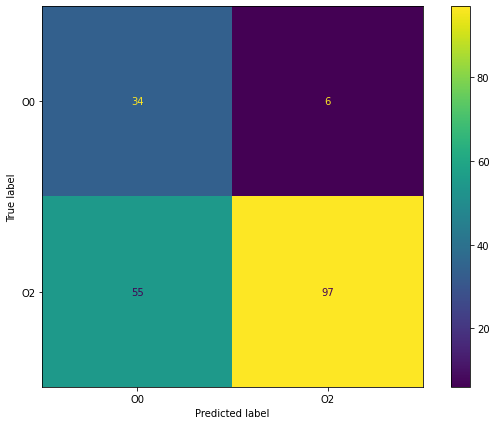

In [ ]:
evaluate_model(eclf2, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

### Disassembled - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_compiler)
X_victorized_test_scaled = scaler.transform(X_test_disassem_compiler)
y_train_grid = y_train_disassem_compiler
y_test_grid = y_test['compiler'] 

In [ ]:
clf1 = clf1_LR_DC
clf2 = clf2_DT_DC
clf3 = clf3_AB_DC
clf4= clf4_RF_DC

In [ ]:
# voting hard uses predicted class labels for majority rule voting (take the majority prediciton from models even if not the best)
estimators=[
        ('LR', clf1), ('DT', clf2), ('AB', clf3), ( 'RF', clf4) ]
        
eclf1 = VotingClassifier(estimators = estimators, voting='hard')

eclf1 = eclf1.fit(X_victorized_train_scaled, y_train_grid)
comp_ens_predict = eclf1.predict(X_victorized_test_scaled)
eclf1_score = accuracy_score(y_test_grid, comp_ens_predict)

# print(comp_ens_predict)
print('Hard voting ensemble',eclf1_score)


# # two ways to access any (one estimator for prediction) fitted sub-estimators by name.
# np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))

# voting soft predicts the class label based on the argmax of the sums of the predicted probabilities
# Predict the class with the largest summed probability from models.
eclf2 = VotingClassifier(estimators=estimators, voting='soft')

eclf2 = eclf2.fit(X_victorized_train_scaled, y_train_grid)
comp_ens2_predict = eclf2.predict(X_victorized_test_scaled)
eclf2_score = accuracy_score(y_test_grid, comp_ens2_predict)

# print(comp_ens2_predict)
print('Soft voting ensemble',eclf2_score)

Hard voting ensemble 1.0
Soft voting ensemble 1.0


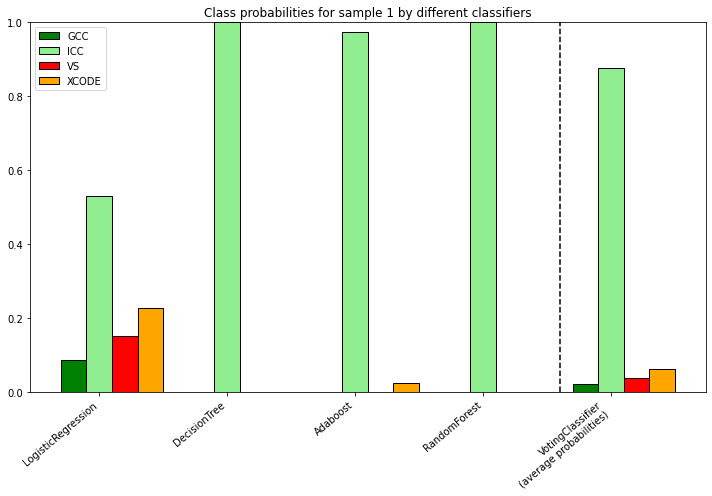

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(X_victorized_train_scaled, y_train_grid).predict_proba(X_victorized_test_scaled) for c in (clf1, clf2, clf3,clf4, eclf2)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]
class3_1 = [pr[0, 2] for pr in probas]
class4_1 = [pr[0, 3] for pr in probas]

#plotting
N = 5  # number of groups
ind = np.arange(N)  # group positions
width = 0.2  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
# 
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,color="lightgreen", edgecolor="k")
p3 = ax.bar(ind + 2*width, np.hstack(([class3_1[:-1], [0]])), width,color="red", edgecolor="k")
p4 = ax.bar(ind + 3*width, np.hstack(([class4_1[:-1], [0]])), width,color="orange", edgecolor="k")

# bars for VotingClassifier
p5 = ax.bar(ind, [0, 0, 0,0, class1_1[-1]], width, color="green", edgecolor="k")
p6 = ax.bar( ind + width, [0, 0, 0, 0, class2_1[-1]], width, color="lightgreen", edgecolor="k")
p7 = ax.bar( ind + 2*width, [0, 0, 0, 0, class3_1[-1]], width, color="red", edgecolor="k")
p8 = ax.bar( ind + 3*width, [0, 0, 0, 0, class4_1[-1]], width, color="orange", edgecolor="k")


# plot annotations
plt.axvline(3.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression",
        "DecisionTree",
        "Adaboost",
        "RandomForest",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0],p3[0], p4[0]], ["GCC", "ICC", "VS", "XCODE"], loc="upper left")
plt.tight_layout()
plt.show()

Train Accuracy : 1.0
	Train Confusion Matrix:


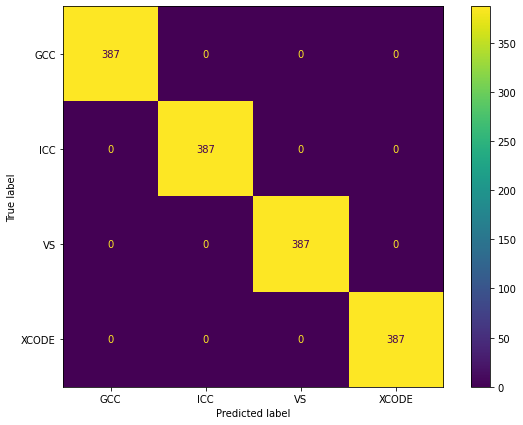

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

         GCC       1.00      1.00      1.00        97
         ICC       1.00      1.00      1.00        33
          VS       1.00      1.00      1.00        34
       XCODE       1.00      1.00      1.00        28

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

--------------------------------------------------
Validation Accuracy : 1.0
		 validation Confusion Matrix:


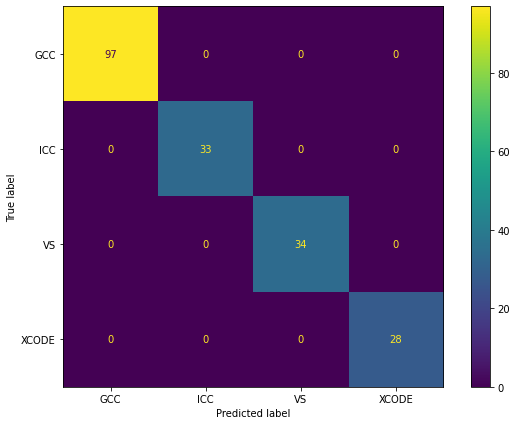

In [ ]:
evaluate_model(eclf2, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

### Disassembled - Optimization Level

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_opt)
X_victorized_test_scaled = scaler.transform(X_test_disassem_opt)
y_train_grid = y_train_disassem_opt
y_test_grid = y_test['opt_level'] 

In [ ]:
clf1 = clf1_LR_DO
clf2 = clf2_DT_DO
clf3 = clf3_AB_DO
clf4= clf4_RF_DO

In [ ]:
disassembled_scores = []

In [ ]:
LR_predict = clf1.predict(X_victorized_test_scaled)
LR_score = accuracy_score(y_test_grid, LR_predict)
disassembled_scores.append(LR_score)
LR_score

0.71875

In [ ]:
DT_predict = clf2.predict(X_victorized_test_scaled)
DT_score = accuracy_score(y_test_grid, DT_predict)
disassembled_scores.append(DT_score)
DT_score

0.7083333333333334

In [ ]:
AB_predict = clf3.predict(X_victorized_test_scaled)
AB_score = accuracy_score(y_test_grid, AB_predict)
disassembled_scores.append(AB_score)
AB_score

0.8385416666666666

In [ ]:
RF_predict = clf4.predict(X_victorized_test_scaled)
RF_score = accuracy_score(y_test_grid, RF_predict)
disassembled_scores.append(RF_score)
RF_score

0.796875

In [ ]:
# voting hard uses predicted class labels for majority rule voting (take the majority prediciton from models even if not the best)
estimators=[
        ('LR', clf1), ('DT', clf2), ('AB', clf3), ( 'RF', clf4) ]
        
eclf1 = VotingClassifier(estimators = estimators, voting='hard')

eclf1 = eclf1.fit(X_victorized_train_scaled, y_train_grid)
comp_ens_predict = eclf1.predict(X_victorized_test_scaled)
eclf1_score = accuracy_score(y_test_grid, comp_ens_predict)

# print(comp_ens_predict)
print('Hard voting ensemble',eclf1_score)


# # two ways to access any (one estimator for prediction) fitted sub-estimators by name.
# np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))

# voting soft predicts the class label based on the argmax of the sums of the predicted probabilities
# Predict the class with the largest summed probability from models.
eclf2 = VotingClassifier(estimators=estimators, voting='soft')

eclf2 = eclf2.fit(X_victorized_train_scaled, y_train_grid)
comp_ens2_predict = eclf2.predict(X_victorized_test_scaled)
eclf2_score = accuracy_score(y_test_grid, comp_ens2_predict)

# print(comp_ens2_predict)
print('Soft voting ensemble',eclf2_score)

Hard voting ensemble 0.7708333333333334
Soft voting ensemble 0.7447916666666666


In [ ]:
disassembled_scores.append(eclf1_score)
disassembled_scores.append(eclf2_score)

disassembled_scores

[0.71875,
 0.7083333333333334,
 0.8385416666666666,
 0.796875,
 0.7708333333333334,
 0.7447916666666666]

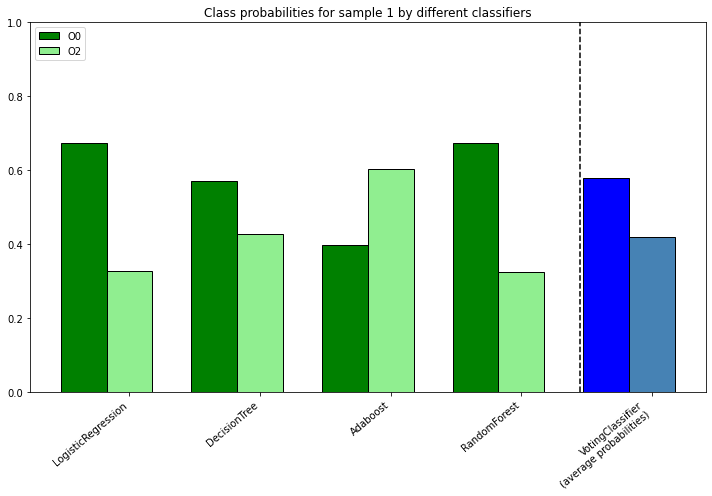

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(X_victorized_train_scaled, y_train_grid).predict_proba(X_victorized_test_scaled) for c in (clf1, clf2, clf3, clf4, eclf2)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 5  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-4
# bar probability[4 bars], one for each classifier[1-4] of the first class for the first sample
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")

# bar probability[4 bars], one for each classifier[1-4] of the second class for the first sample
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color="lightgreen", edgecolor="k")


# bars for VotingClassifier
# bar probability for the VotingClassifier of the first class for the first sample
p3 = ax.bar(ind, [0, 0, 0,0, class1_1[-1]], width, color="blue", edgecolor="k")

# bar probability for the VotingClassifier of the first class for the first sample
p4 = ax.bar(ind + width, [0, 0, 0,0, class2_1[-1]], width, color="steelblue", edgecolor="k")

# plot annotations
plt.axvline(3.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression",
        "DecisionTree",
        "Adaboost",
        "RandomForest",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["O0", "O2"], loc="upper left")
plt.tight_layout()
plt.show()

Train Accuracy : 0.8916256157635468
	Train Confusion Matrix:


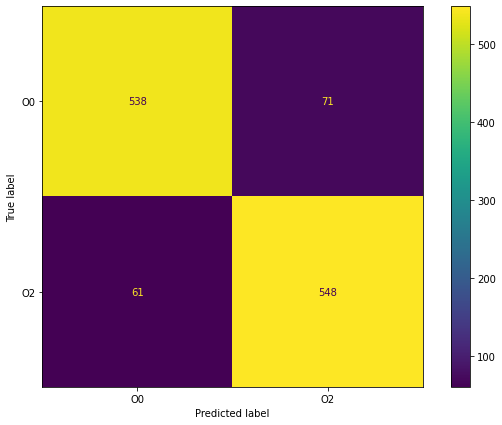

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

          O0       0.39      0.40      0.40        40
          O2       0.84      0.84      0.84       152

    accuracy                           0.74       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.75      0.74      0.75       192

--------------------------------------------------
Validation Accuracy : 0.7447916666666666
		 validation Confusion Matrix:


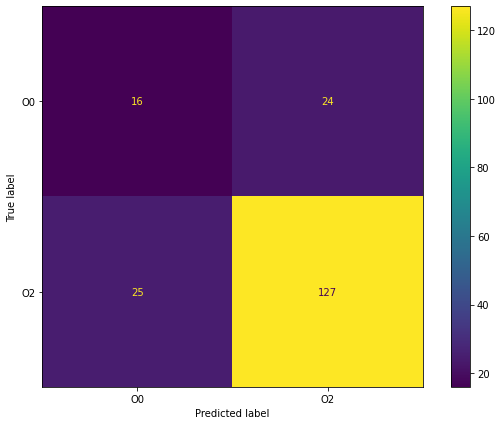

In [ ]:
evaluate_model(eclf2, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

# Stacking Ensemble

### Strings - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_compiler)
X_victorized_test_scaled = scaler.transform(X_test_strings_compiler)
y_train_grid = y_train_strings_compiler
y_test_grid = y_test['compiler'] 

In [ ]:
clf1 = clf1_LR_SC
clf2 = clf2_DT_SC
clf3 = clf3_AB_SC
clf4= clf4_RF_SC

In [ ]:

stack_estimators=[
        ('DT', clf2), ('AB', clf3),('RF',clf4)]


stack_clf = StackingClassifier(
    estimators=stack_estimators, final_estimator=clf1)

stack_clf = stack_clf.fit(X_victorized_train_scaled, y_train_grid)



comp_stack_clf_predict = stack_clf.predict(X_victorized_test_scaled)
stack_clf_score = accuracy_score(y_test_grid, comp_stack_clf_predict)


print(stack_clf_score)

1.0


Train Accuracy : 1.0
	Train Confusion Matrix:


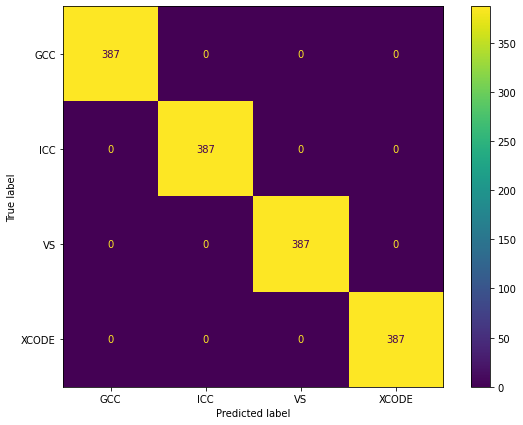

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

         GCC       1.00      1.00      1.00        97
         ICC       1.00      1.00      1.00        33
          VS       1.00      1.00      1.00        34
       XCODE       1.00      1.00      1.00        28

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

--------------------------------------------------
Validation Accuracy : 1.0
		 validation Confusion Matrix:


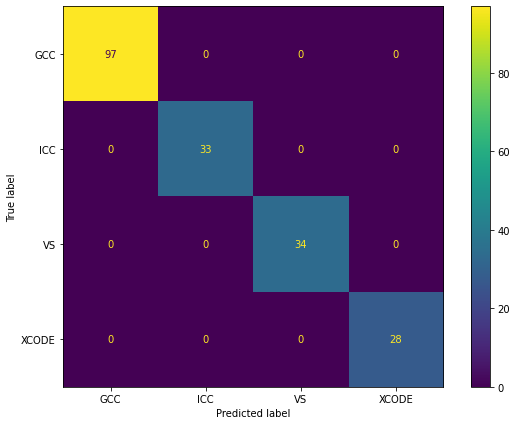

In [ ]:
evaluate_model(stack_clf, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

### Strings - Optimization Level

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_strings_opt)
X_victorized_test_scaled = scaler.transform(X_test_strings_opt)
y_train_grid = y_train_strings_opt
y_test_grid = y_test['opt_level'] 

In [ ]:
clf1 = clf1_LR_SO
clf2 = clf2_DT_SO
clf3 = clf3_AB_SO
clf4= clf4_RF_SO

In [ ]:
stack_estimators=[
        ('DT', clf2), ('AB', clf3),('RF',clf4)]


stack_clf = StackingClassifier(
    estimators=stack_estimators, final_estimator=clf1)

stack_clf = stack_clf.fit(X_victorized_train_scaled, y_train_grid)



opt_stack_clf_predict = stack_clf.predict(X_victorized_test_scaled)
stack_clf_score = accuracy_score(y_test_grid, opt_stack_clf_predict)


print(stack_clf_score)

0.6822916666666666


Train Accuracy : 0.7405582922824302
	Train Confusion Matrix:


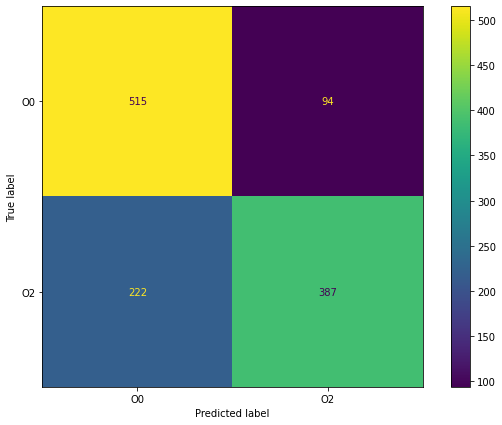

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

          O0       0.38      0.85      0.53        40
          O2       0.94      0.64      0.76       152

    accuracy                           0.68       192
   macro avg       0.66      0.74      0.64       192
weighted avg       0.83      0.68      0.71       192

--------------------------------------------------
Validation Accuracy : 0.6822916666666666
		 validation Confusion Matrix:


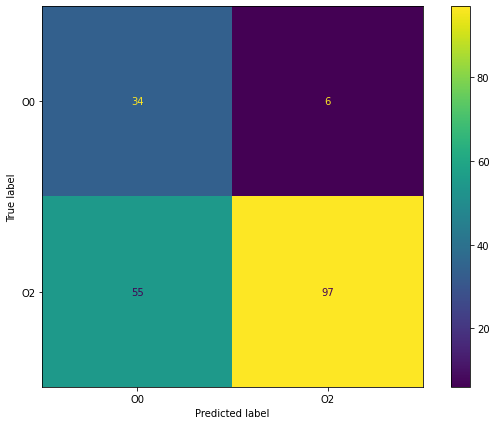

In [ ]:
evaluate_model(stack_clf, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

In [ ]:
string_scores.append(stack_clf_score)
string_scores

[0.6822916666666666,
 0.6822916666666666,
 0.6822916666666666,
 0.765625,
 0.6822916666666666,
 0.6822916666666666,
 0.6822916666666666]

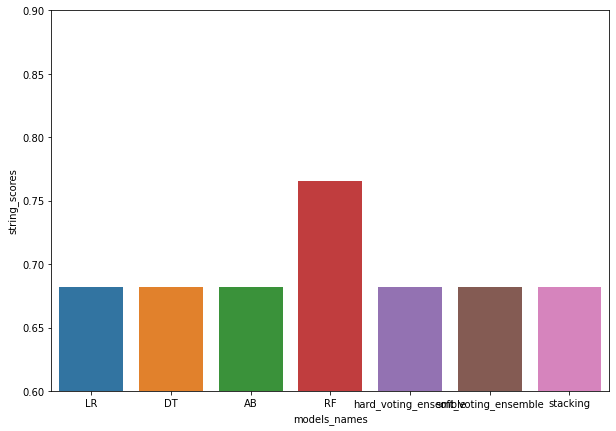

In [ ]:
df=pd.DataFrame({'string_scores':string_scores,'models_names':models_names})
sns.barplot(data=df, x='models_names', y= 'string_scores')
plt.ylim(0.6, 0.9)
plt.show()

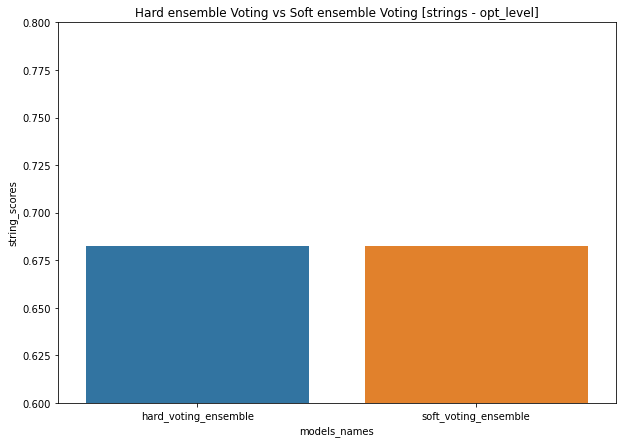

In [ ]:
df=pd.DataFrame({'string_scores':string_scores[-3:-1],'models_names':models_names[-3:-1]})
sns.barplot(data=df, x='models_names', y= 'string_scores')
plt.title('Hard ensemble Voting vs Soft ensemble Voting [strings - opt_level]')

plt.ylim(0.6, 0.8)
plt.show()

### Disassembled - Compiler

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_compiler)
X_victorized_test_scaled = scaler.transform(X_test_disassem_compiler)
y_train_grid = y_train_disassem_compiler
y_test_grid = y_test['compiler'] 

In [ ]:
clf1 = clf1_LR_DC
clf2 = clf2_DT_DC
clf3 = clf3_AB_DC
clf4= clf4_RF_DC

In [ ]:
stack_estimators=[
        ('DT', clf2), ('AB', clf3),('RF',clf4)]


stack_clf = StackingClassifier(
    estimators=stack_estimators, final_estimator=clf1)

stack_clf = stack_clf.fit(X_victorized_train_scaled, y_train_grid)



comp_stack_clf_predict = stack_clf.predict(X_victorized_test_scaled)
stack_clf_score = accuracy_score(y_test_grid, comp_stack_clf_predict)


print(stack_clf_score)

1.0


In [ ]:
evaluate_model(stack_clf, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

### Disassembled - Optimization Level

In [553]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_opt)
X_victorized_test_scaled = scaler.transform(X_test_disassem_opt)
y_train_grid = y_train_disassem_opt
y_test_grid = y_test['opt_level'] 

In [ ]:
clf1 = clf1_LR_DO
clf2 = clf2_DT_DO
clf3 = clf3_AB_DO
clf4= clf4_RF_DO

In [ ]:
stack_estimators=[
        ('DT', clf2), ('AB', clf3),('RF',clf4)]


stack_clf = StackingClassifier(
    estimators=stack_estimators, final_estimator=clf1)

stack_clf = stack_clf.fit(X_victorized_train_scaled, y_train_grid)



opt_stack_clf_predict = stack_clf.predict(X_victorized_test_scaled)
stack_clf_score = accuracy_score(y_test_grid, opt_stack_clf_predict)


print(stack_clf_score)

0.7291666666666666


Train Accuracy : 0.9088669950738916
	Train Confusion Matrix:


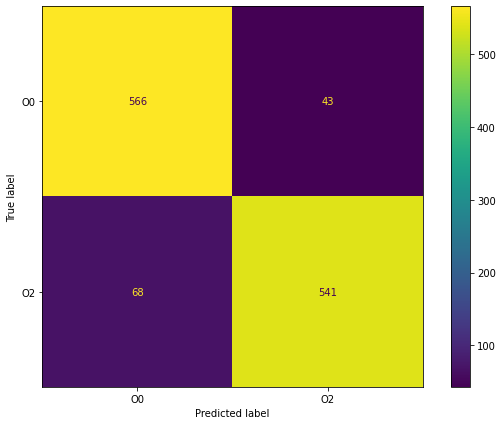

--------------------------------------------------
	classification_report:
               precision    recall  f1-score   support

          O0       0.37      0.42      0.40        40
          O2       0.84      0.81      0.83       152

    accuracy                           0.73       192
   macro avg       0.61      0.62      0.61       192
weighted avg       0.74      0.73      0.74       192

--------------------------------------------------
Validation Accuracy : 0.7291666666666666
		 validation Confusion Matrix:


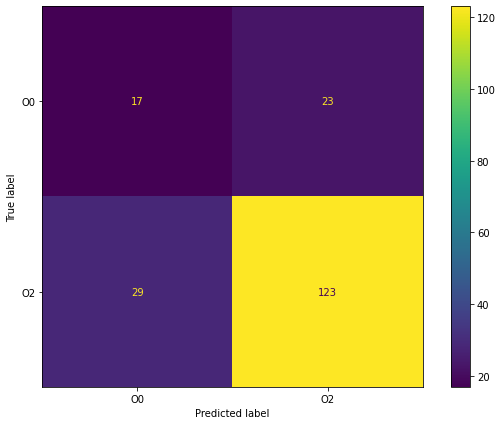

In [ ]:
evaluate_model(stack_clf, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)

In [ ]:
disassembled_scores.append(stack_clf_score)
disassembled_scores

[0.71875,
 0.7083333333333334,
 0.8385416666666666,
 0.796875,
 0.7708333333333334,
 0.7447916666666666,
 0.7291666666666666]

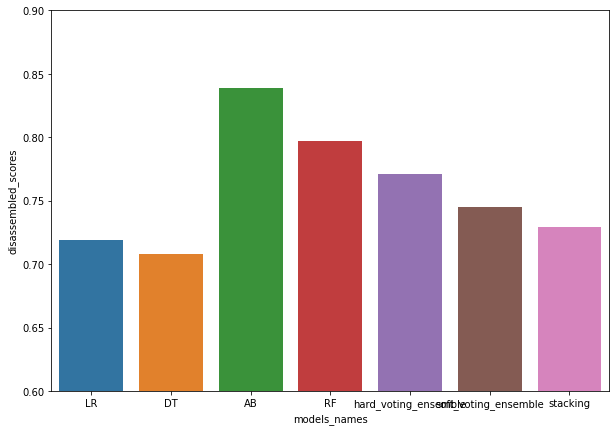

In [ ]:
df=pd.DataFrame({'disassembled_scores':disassembled_scores,'models_names':models_names})
sns.barplot(data=df, x='models_names', y= 'disassembled_scores')

plt.ylim(0.6, 0.9)
plt.show()

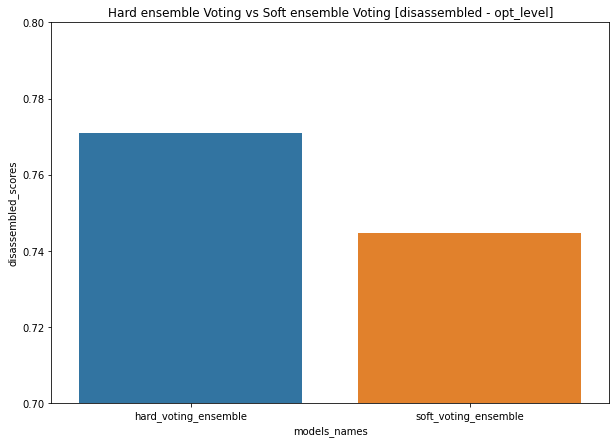

In [ ]:
df=pd.DataFrame({'disassembled_scores':disassembled_scores[-3:-1],'models_names':models_names[-3:-1]})

sns.barplot(data=df, x='models_names', y= 'disassembled_scores')
plt.title('Hard ensemble Voting vs Soft ensemble Voting [disassembled - opt_level]')


plt.ylim(0.7, 0.8)

plt.show()

# NN 

## Disassembled - Optimization Level

In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense, BatchNormalization
from keras import Input, losses

In [ ]:
vectorizer = build_vectorizers(2000,X_train['disassem'])
X_train_disassem, X_test_disassem= transform_vectors(vectorizer, X_train['disassem'], x_test_trans=X_test['disassem'])
features_names= X_train_disassem.columns.values.tolist()
new_features= k_features_filter( 14, X_train_disassem,y_train['opt_level'], features_names,  selector='chi2')
X_train_disassem_opt= X_train_disassem[new_features]
X_test_disassem_opt= X_test_disassem[new_features]

In [ ]:
X_test_disassem_opt = pd.concat([X_test_disassem_opt, x_comp_test], axis = 1)

X_train_disassem_opt= pd.concat([X_train_disassem_opt, x_comp], axis = 1)
y_train_disassem_opt=y_train['opt_level']

In [ ]:
scaler = StandardScaler()
X_victorized_train_scaled = scaler.fit_transform(X_train_disassem_opt)
X_victorized_test_scaled = scaler.transform(X_test_disassem_opt)
y_train_grid = y_train_disassem_opt
y_test_grid = y_test['opt_level'] 

In [ ]:
X_victorized_train_scaled.shape

(765, 15)

In [ ]:
model = Sequential()
model.add(Input(shape=(15,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation = 'softmax'))
model.output_shape

(None, 2)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               2048      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 16,610
Trainable params: 16,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
le.fit(y_train_grid)
y_train_grid = le.transform(y_train_grid)
y_test_grid = le.transform(y_test_grid)
list(le.classes_)

['O0', 'O2']

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='min')
mcp_save = ModelCheckpoint('best.hdf5', save_best_only=True, monitor='val_acc', mode='max')


model.compile(optimizer="adam", loss= losses.SparseCategoricalCrossentropy(), metrics="acc")
history = model.fit(x=X_victorized_train_scaled, y=y_train_grid, batch_size=16, epochs=200, validation_data=(X_victorized_test_scaled, y_test_grid), callbacks=[earlyStopping, mcp_save])

Epoch 1/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5075 - acc: 0.7961 - val_loss: 0.5033 - val_acc: 0.7917
Epoch 2/200
48/48 [==============================] - 0s 5ms/step - loss: 0.4870 - acc: 0.7961 - val_loss: 0.4728 - val_acc: 0.7917
Epoch 3/200
48/48 [==============================] - 0s 4ms/step - loss: 0.4466 - acc: 0.8157 - val_loss: 0.4302 - val_acc: 0.8385
Epoch 4/200
48/48 [==============================] - 0s 5ms/step - loss: 0.4147 - acc: 0.8497 - val_loss: 0.4034 - val_acc: 0.8438
Epoch 5/200
48/48 [==============================] - 0s 4ms/step - loss: 0.4001 - acc: 0.8523 - val_loss: 0.3950 - val_acc: 0.8438
Epoch 6/200
48/48 [==============================] - 0s 4ms/step - loss: 0.3857 - acc: 0.8484 - val_loss: 0.3929 - val_acc: 0.8229
Epoch 7/200
48/48 [==============================] - 0s 5ms/step - loss: 0.3803 - acc: 0.8497 - val_loss: 0.3748 - val_acc: 0.8438
Epoch 8/200
48/48 [==============================] - 0s 5ms/step - loss: 0.3734 - 

In [ ]:
from keras.models import load_model
best_model = load_model('best.hdf5')

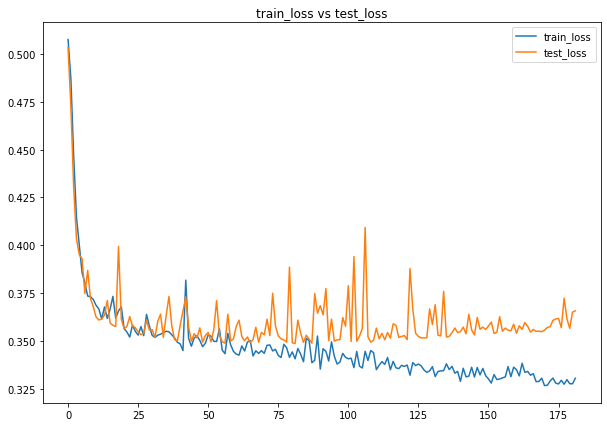

In [ ]:
# evaluate the best_model
train_loss, train_acc = best_model.evaluate(X_victorized_train_scaled, y_train_grid, verbose=0)
test_loss, test_acc = best_model.evaluate(X_victorized_test_scaled, y_test_grid, verbose=0)

# plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.title('train_loss vs test_loss')
plt.legend()
plt.show()

Train Accuracy: 0.856, Test Accuracy: 0.859


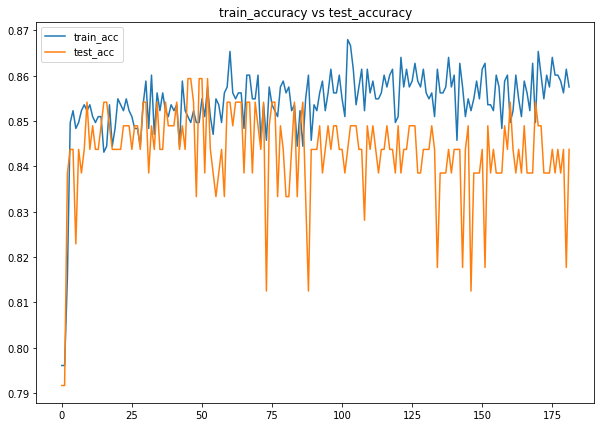

In [ ]:
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='test_acc')
plt.title('train_accuracy vs test_accuracy')
plt.legend()
plt.show()

In [ ]:
np.argmax(best_model.predict(X_victorized_test_scaled), axis=1)

6/6 [==============================] - 0s 3ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

24/24 [==============================] - 0s 2ms/step
Train Accuracy : 0.8562091503267973
	Train Confusion Matrix:
24/24 [==============================] - 0s 2ms/step


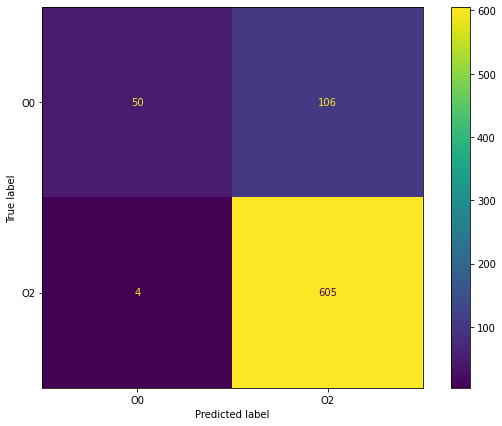

--------------------------------------------------
6/6 [==============================] - 0s 4ms/step
	classification_report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.49        40
           1       0.85      1.00      0.92       152

    accuracy                           0.86       192
   macro avg       0.92      0.66      0.70       192
weighted avg       0.88      0.86      0.83       192

--------------------------------------------------
6/6 [==============================] - 0s 5ms/step
Test Accuracy : 0.859375
		 test Confusion Matrix:
6/6 [==============================] - 0s 4ms/step


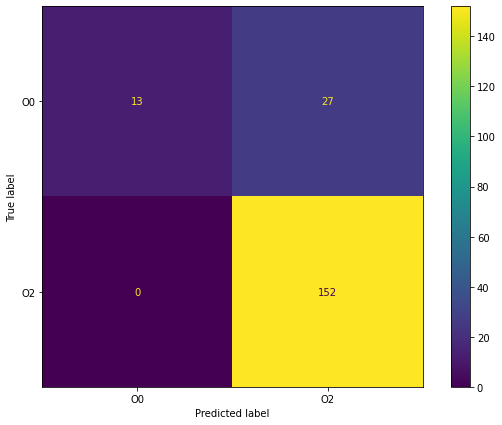

In [ ]:
 evaluate_model_nn(best_model, X_victorized_train_scaled, y_train_grid, X_victorized_test_scaled, y_test_grid)